# Lead Scoring Case Study

## Problem Statement:
 - An education company named X Education sells online courses to industry professionals.
 - Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.
 - To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Business Objectives:
 - X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 
 - The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. 

## 📚1. Importing Necessary Libraries:

In [1]:
# Analysis
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas import plotting
import missingno as ms

# Importing scikit learn packages for splitting the data into train, test, to encode categorical variables, to scale the features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## ⚠️Supress Warnings:

In [2]:
import warnings
warnings.filterwarnings('ignore')

## ⚙️Environment Settings

In [3]:
pd.set_option('display.max_rows', 500)

## ⚙️Suppressing scientific notations in Pandas

In [4]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) 

## 📝🧠 2. Reading the Dataset & Understanding of the Data

In [5]:
# Loading the data.
leads_df=pd.read_csv('Leads.csv')

In [6]:
# Checking the data.
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0       0.0000   
1  Organic Search           No          No          0       5.0000   
2  Direct Traffic           No          No          1       2.0000   
3  Direct Traffic           No          No          0       1.0000   
4          Google           No          No          1       2.0000   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                0.0000  ...   
1                          674                2.5000  ...   
2                         1532                2.0000  ...   
3                          305                1.0000  ...   
4                         1428                1.0000  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                     15.0000                    15.0000   
1                     15.0000                    15.0000   
2                     14.0000                    20.0000   
3                     13.0000                    17.0000   
4                     15.0000                    18.0000   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [7]:
# Checking the Shape of the DataFrame
print('(No. of rows, No. of columns):', leads_df.shape)

(No. of rows, No. of columns): (9240, 37)


In [8]:
# Getting the information about the DataFrame
leads_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Generating descriptive statistics of the DataFrame. 
# It summarizes the central tendency, dispersion and shape of the dataset's distribution, excluding NaN values.
leads_df.describe().transpose()

count        mean        std         min  \
Lead Number                 9240.0000 617188.4356 23405.9957 579533.0000   
Converted                   9240.0000      0.3854     0.4867      0.0000   
TotalVisits                 9103.0000      3.4452     4.8549      0.0000   
Total Time Spent on Website 9240.0000    487.6983   548.0215      0.0000   
Page Views Per Visit        9103.0000      2.3628     2.1614      0.0000   
Asymmetrique Activity Score 5022.0000     14.3063     1.3867      7.0000   
Asymmetrique Profile Score  5022.0000     16.3449     1.8114     11.0000   

                                    25%         50%         75%         max  
Lead Number                 596484.5000 615479.0000 637387.2500 660737.0000  
Converted                        0.0000      0.0000      1.0000      1.0000  
TotalVisits                      1.0000      3.0000      5.0000    251.0000  
Total Time Spent on Website     12.0000    248.0000    936.0000   2272.0000  
Page Views Per Visit             1.0000      2.0000      3.0000     55.0000  
Asymmetrique Activity Score     14.0000     14.0000     15.0000     18.0000  
Asymmetrique Profile Score      15.0000     16.0000     18.0000     20.0000

## 🧹3. Data Cleansing & Manipulation

In [10]:
leads_df.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

### Observation:
 - Many Columns have null values.

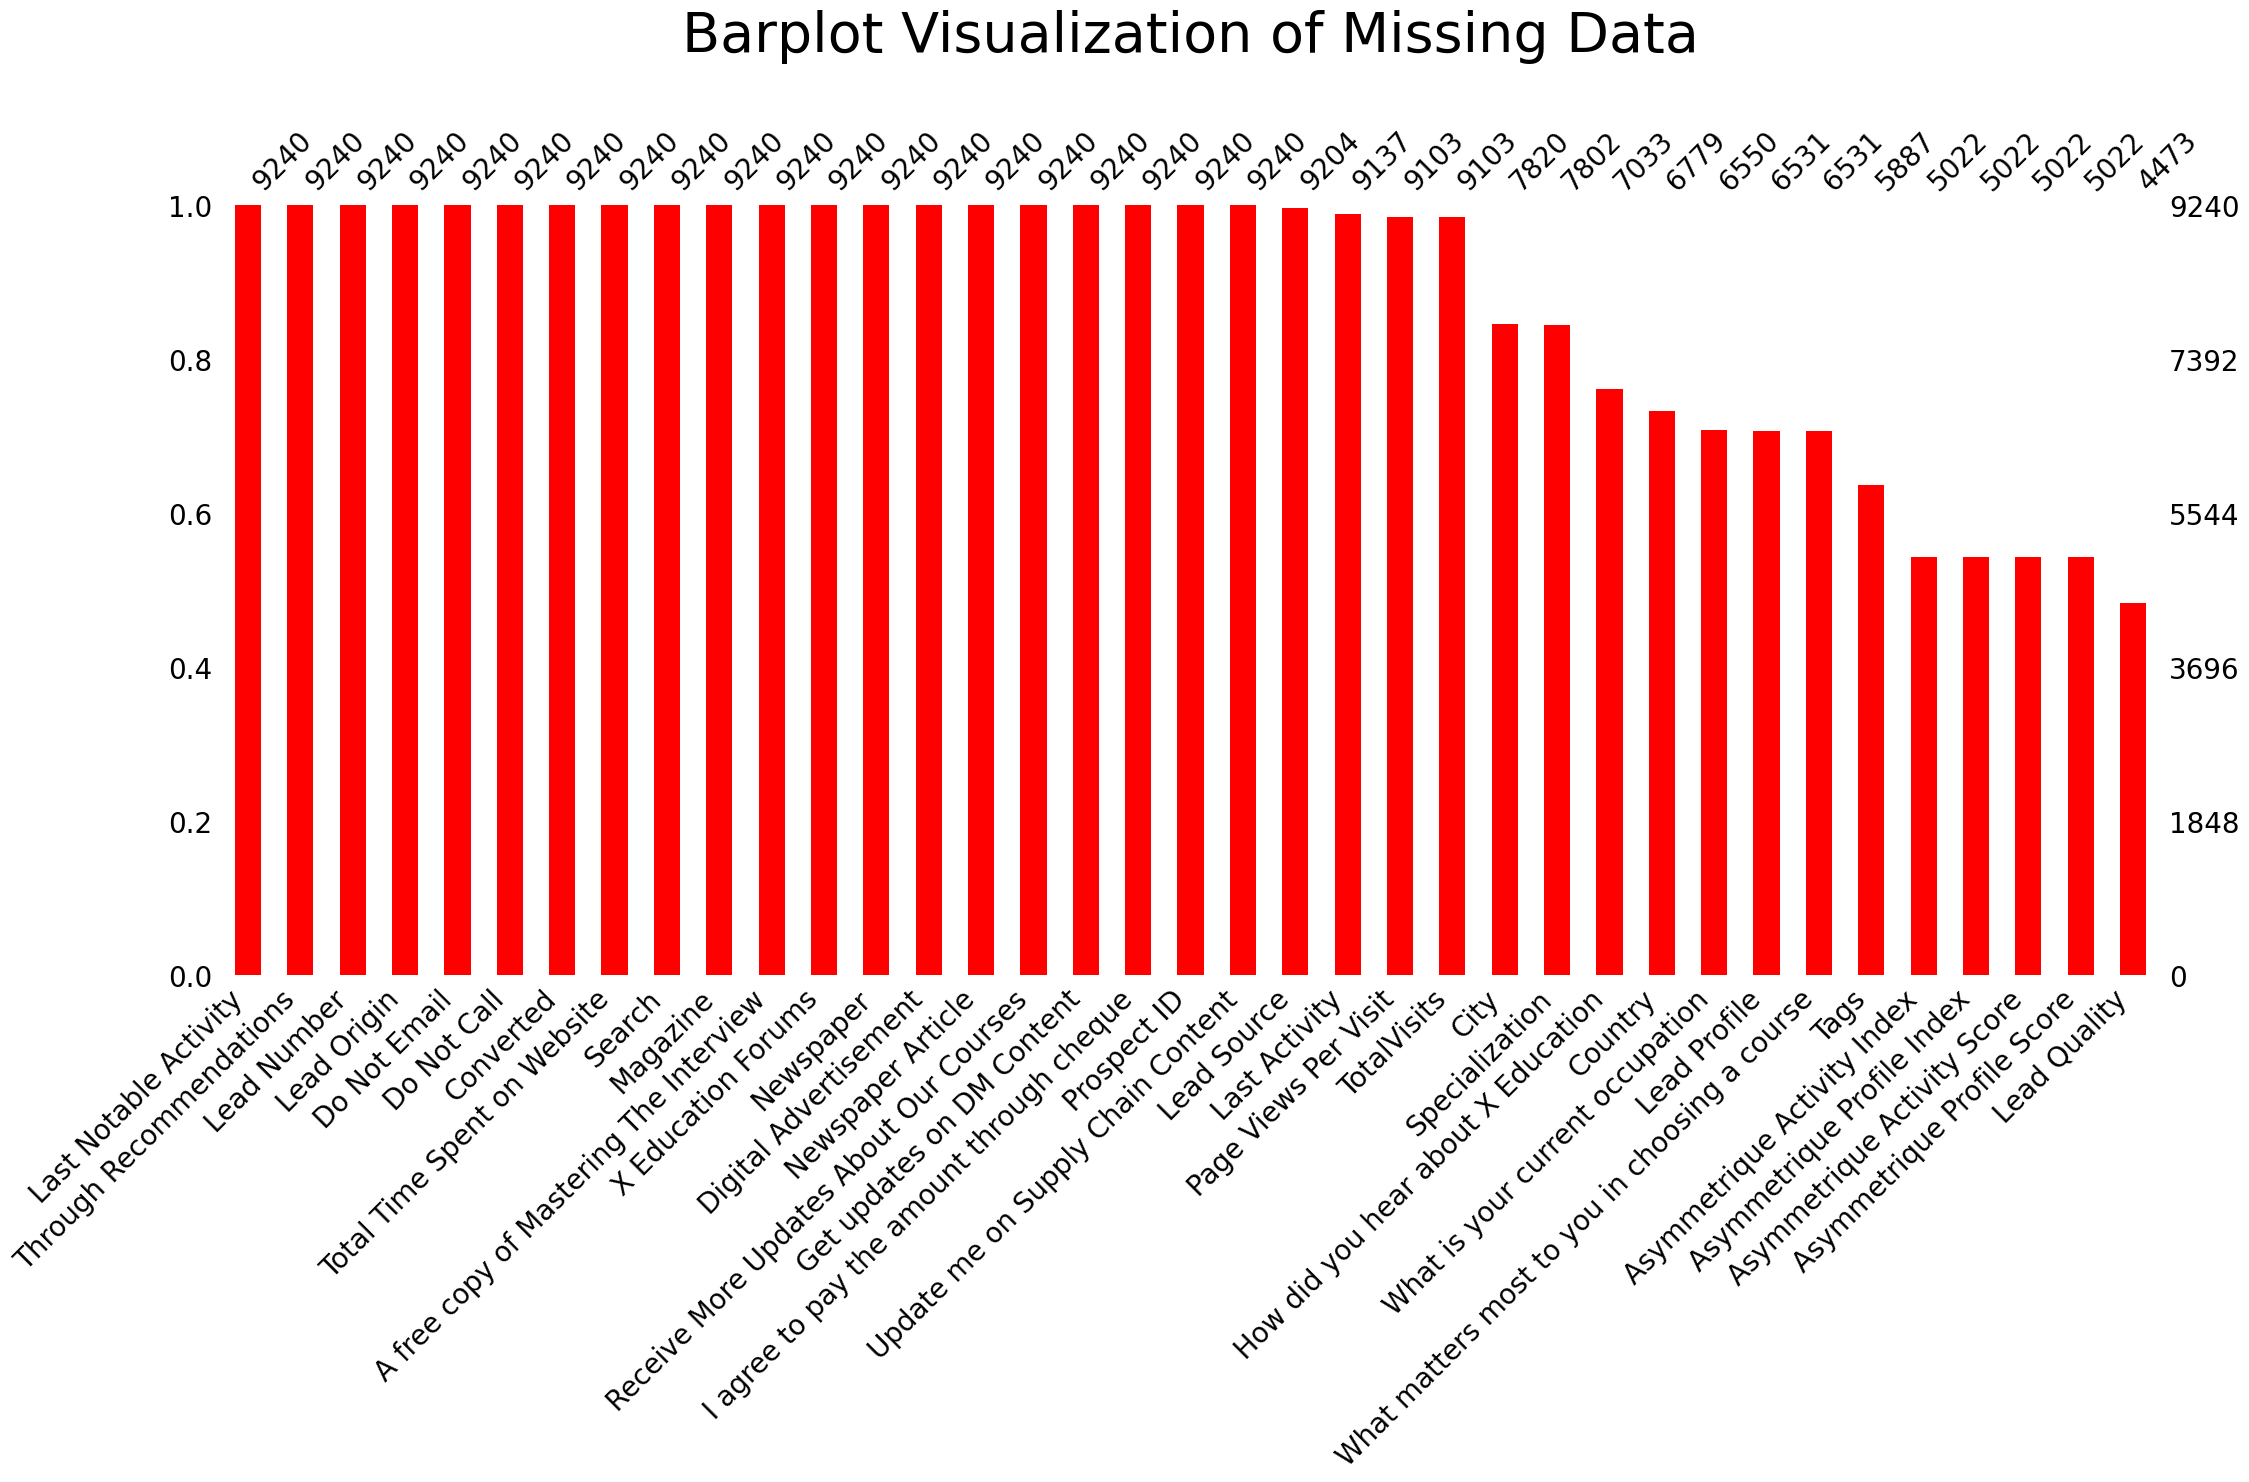

In [11]:
# missingno provides a clear visualization to understand the presence of missing data within the DataFrame
# Visualizing the missing data within the Appliction Data
ms.bar(leads_df, color = ('red'), sort = 'descending', fontsize=20)
plt.title('Barplot Visualization of Missing Data\n', fontsize=40)
plt.show()
# The height of the bar indicates how complete that column is.

### Inferences from the missingno plot: 
 - The above bar plot shows some incomplete bars clearly i.e., there are some missing values in those columns.

### 👉Reusable User Defined Function to get the percentage of missing values in the dataset

In [12]:
# Defining a reusable function to get an idea about missing data
def miss_perc(x):
    return 100*x.isnull().mean().sort_values(ascending = False)

In [13]:
miss_perc(leads_df)

Lead Quality                                    51.5909
Asymmetrique Activity Index                     45.6494
Asymmetrique Profile Score                      45.6494
Asymmetrique Activity Score                     45.6494
Asymmetrique Profile Index                      45.6494
Tags                                            36.2879
Lead Profile                                    29.3182
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
How did you hear about X Education              23.8853
Specialization                                  15.5628
City                                            15.3680
Page Views Per Visit                             1.4827
TotalVisits                                      1.4827
Last Activity                                    1.1147
Lead Source                                      0.3896
Receive More Updates About Our Courses          

In [14]:
# Checking for duplicates if any
# Let's create a copy of the original dataset on the safe side and to avoid the risk of losing the data.
leads_df_copy = leads_df

# Let's drop the duplicates if any
leads_df_copy.drop_duplicates(subset=None, inplace=True)
# Let's check the shape of this dataframe
leads_df_copy.shape

(9240, 37)

### Observaton:
 - It's clear that there are no duplicates in any row/column.

In [15]:
num_cols = leads_df.dtypes[(leads_df.dtypes == 'int64') | (leads_df.dtypes == 'float64')].keys()
num_cols

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [16]:
num_df = leads_df[num_cols]
num_df

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0          660737          0       0.0000                            0   
1          660728          0       5.0000                          674   
2          660727          1       2.0000                         1532   
3          660719          0       1.0000                          305   
4          660681          1       2.0000                         1428   
...           ...        ...          ...                          ...   
9235       579564          1       8.0000                         1845   
9236       579546          0       2.0000                          238   
9237       579545          0       2.0000                          199   
9238       579538          1       3.0000                          499   
9239       579533          1       6.0000                         1279   

      Page Views Per Visit  Asymmetrique Activity Score  \
0                   0.0000                      15.0000   
1                   2.5000                      15.0000   
2                   2.0000                      14.0000   
3                   1.0000                      13.0000   
4                   1.0000                      15.0000   
...                    ...                          ...   
9235                2.6700                      15.0000   
9236                2.0000                      14.0000   
9237                2.0000                      13.0000   
9238                3.0000                      15.0000   
9239                3.0000                      15.0000   

      Asymmetrique Profile Score  
0                        15.0000  
1                        15.0000  
2                        20.0000  
3                        17.0000  
4                        18.0000  
...                          ...  
9235                     17.0000  
9236                     19.0000  
9237                     20.0000  
9238                     16.0000  
9239                     18.0000  

[9240 rows x 7 columns]

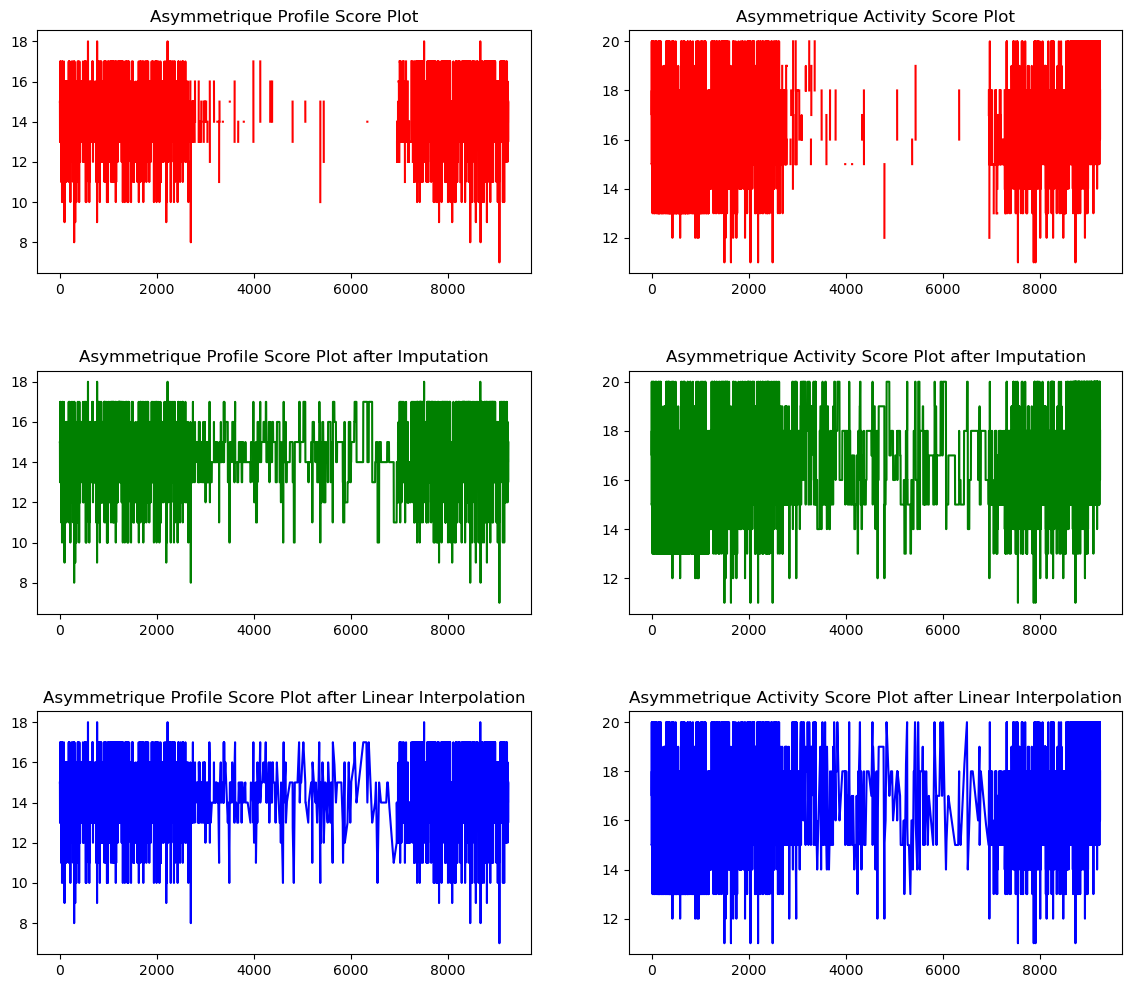

In [17]:
plt.figure(figsize=(14,12))
plt.subplot(3,2,1)
plt.title("Asymmetrique Profile Score Plot")
plt.plot(num_df.iloc[:, 5], color = 'red')
plt.subplot(3,2,2)
plt.title("Asymmetrique Activity Score Plot")
plt.plot(num_df.iloc[:, 6], color = 'red')
plt.subplot(3,2,3)
plt.title("Asymmetrique Profile Score Plot after Imputation")
plt.plot(num_df.iloc[:, 5].fillna(method = 'ffill'), color = 'green')
plt.subplot(3,2,4)
plt.title("Asymmetrique Activity Score Plot after Imputation")
plt.plot(num_df.iloc[:, 6].fillna(method = 'ffill'), color = 'green')
plt.subplot(3,2,5)
plt.title("Asymmetrique Profile Score Plot after Linear Interpolation")
plt.plot(num_df.iloc[:, 5].interpolate(), color = 'blue')
plt.subplot(3,2,6)
plt.title("Asymmetrique Activity Score Plot after Linear Interpolation")
plt.plot(num_df.iloc[:, 6].interpolate(), color = 'blue')
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.show()

### Observation:
 - As there are many null values in the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score', 'imputation' or 'Interpolation' don't give desirable results. It's clear from the above plots. Instead we can drop them.

In [18]:
miss_perc(num_df)

Asymmetrique Activity Score   45.6494
Asymmetrique Profile Score    45.6494
TotalVisits                    1.4827
Page Views Per Visit           1.4827
Lead Number                    0.0000
Converted                      0.0000
Total Time Spent on Website    0.0000
dtype: float64

### 👉3.1: Reusable User Defined Function to drop the columns with more than 40% missing values in the dataset

In [19]:
def rem_nulls(y):
    pre_shape = y.shape
    col_to_drop=list(y.columns[100*y.isnull().mean()>40])
    y.drop(labels=col_to_drop, axis=1, inplace=True)
    print("Number of Columns dropped\t: ", len(col_to_drop))
    print('***************************************')
    print('List of columns dropped:',col_to_drop)
    print('***************************************')
    print('\n(No. of rows, No. of columns) before dropping:', pre_shape,'\n(No. of rows, No. of columns) after dropping:', y.shape)
    return y.head()

In [20]:
rem_nulls(leads_df)

Number of Columns dropped	:  5
***************************************
List of columns dropped: ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
***************************************

(No. of rows, No. of columns) before dropping: (9240, 37) 
(No. of rows, No. of columns) after dropping: (9240, 32)


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0       0.0000   
1  Organic Search           No          No          0       5.0000   
2  Direct Traffic           No          No          1       2.0000   
3  Direct Traffic           No          No          0       1.0000   
4          Google           No          No          1       2.0000   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                0.0000  ...   
1                          674                2.5000  ...   
2                         1532                2.0000  ...   
3                          305                1.0000  ...   
4                         1428                1.0000  ...   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 32 columns]

In [21]:
# Checking missing data again
miss_perc(leads_df)

Tags                                            36.2879
Lead Profile                                    29.3182
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
How did you hear about X Education              23.8853
Specialization                                  15.5628
City                                            15.3680
TotalVisits                                      1.4827
Page Views Per Visit                             1.4827
Last Activity                                    1.1147
Lead Source                                      0.3896
Receive More Updates About Our Courses           0.0000
Update me on Supply Chain Content                0.0000
Prospect ID                                      0.0000
Digital Advertisement                            0.0000
Get updates on DM Content                        0.0000
I agree to pay the amount through cheque        

 - The columns'TotalVisits'& 'Page Views Per Visit' have only about 1.48 Percentage Null values. 
 - So, imputing those null values with the most frequent value of respective columns is a good idea.

### 3.2: Null value Imputation for Numerical Columns

In [22]:
# Let's have a look on most frequent value(mode) in 'Total Visits' & 'Page Views Per Visit' columns
leads_df['TotalVisits'].value_counts().head()

0.0000    2189
2.0000    1680
3.0000    1306
4.0000    1120
5.0000     783
Name: TotalVisits, dtype: int64

In [23]:
leads_df['Page Views Per Visit'].value_counts().head()

0.0000    2189
2.0000    1795
3.0000    1196
4.0000     896
1.0000     651
Name: Page Views Per Visit, dtype: int64

In [24]:
# Let's impute null values present in the above columns with mode
se_mode = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
leads_df[['TotalVisits', 'Page Views Per Visit']] = se_mode.fit_transform(leads_df[['TotalVisits', 'Page Views Per Visit']])

In [25]:
miss_perc(leads_df)

Tags                                            36.2879
Lead Profile                                    29.3182
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
How did you hear about X Education              23.8853
Specialization                                  15.5628
City                                            15.3680
Last Activity                                    1.1147
Lead Source                                      0.3896
Through Recommendations                          0.0000
Receive More Updates About Our Courses           0.0000
Prospect ID                                      0.0000
Newspaper                                        0.0000
Update me on Supply Chain Content                0.0000
Get updates on DM Content                        0.0000
I agree to pay the amount through cheque         0.0000
A free copy of Mastering The Interview          

In [26]:
new_num_cols = leads_df.dtypes[(leads_df.dtypes == 'int64') | (leads_df.dtypes == 'float64')].keys()

In [27]:
new_num_df = leads_df[new_num_cols]
new_num_df

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0          660737          0       0.0000                            0   
1          660728          0       5.0000                          674   
2          660727          1       2.0000                         1532   
3          660719          0       1.0000                          305   
4          660681          1       2.0000                         1428   
...           ...        ...          ...                          ...   
9235       579564          1       8.0000                         1845   
9236       579546          0       2.0000                          238   
9237       579545          0       2.0000                          199   
9238       579538          1       3.0000                          499   
9239       579533          1       6.0000                         1279   

      Page Views Per Visit  
0                   0.0000  
1                   2.5000  
2                   2.0000  
3                   1.0000  
4                   1.0000  
...                    ...  
9235                2.6700  
9236                2.0000  
9237                2.0000  
9238                3.0000  
9239                3.0000  

[9240 rows x 5 columns]

In [28]:
miss_perc(new_num_df)

Lead Number                   0.0000
Converted                     0.0000
TotalVisits                   0.0000
Total Time Spent on Website   0.0000
Page Views Per Visit          0.0000
dtype: float64

 - Missing Value Treatment for Numerical Columns has been done.

### 3.3: Null value Imputation for Categorical Columns and Dropping unwanted columns

In [29]:
cat_cols = leads_df.dtypes[~(leads_df.dtypes == 'int64') & ~(leads_df.dtypes == 'float64')].keys()
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [30]:
cat_df = leads_df[cat_cols]
cat_df

Prospect ID              Lead Origin  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1     2a272436-5132-4136-86fa-dcc88c88f482                      API   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4     3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   
...                                    ...                      ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9  Landing Page Submission   
9236  82a7005b-7196-4d56-95ce-a79f937a158d  Landing Page Submission   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c  Landing Page Submission   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9  Landing Page Submission   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  Landing Page Submission   

         Lead Source Do Not Email Do Not Call            Last Activity  \
0         Olark Chat           No          No  Page Visited on Website   
1     Organic Search           No          No             Email Opened   
2     Direct Traffic           No          No             Email Opened   
3     Direct Traffic           No          No              Unreachable   
4             Google           No          No        Converted to Lead   
...              ...          ...         ...                      ...   
9235  Direct Traffic          Yes          No        Email Marked Spam   
9236  Direct Traffic           No          No                 SMS Sent   
9237  Direct Traffic          Yes          No                 SMS Sent   
9238          Google           No          No                 SMS Sent   
9239  Direct Traffic           No          No                 SMS Sent   

           Country             Specialization  \
0              NaN                     Select   
1            India                     Select   
2            India    Business Administration   
3            India      Media and Advertising   
4            India                     Select   
...            ...                        ...   
9235  Saudi Arabia     IT Projects Management   
9236         India      Media and Advertising   
9237         India    Business Administration   
9238         India  Human Resource Management   
9239    Bangladesh    Supply Chain Management   

     How did you hear about X Education What is your current occupation  ...  \
0                                Select                      Unemployed  ...   
1                                Select                      Unemployed  ...   
2                                Select                         Student  ...   
3                         Word Of Mouth                      Unemployed  ...   
4                                 Other                      Unemployed  ...   
...                                 ...                             ...  ...   
9235                             Select                      Unemployed  ...   
9236                             Select                      Unemployed  ...   
9237                             Select                      Unemployed  ...   
9238                      Online Search                             NaN  ...   
9239                             Select                      Unemployed  ...   

     Through Recommendations Receive More Updates About Our Courses  \
0                         No                                     No   
1                         No                                     No   
2                         No                                     No   
3                         No                                     No   
4                         No                                     No   
...                      ...                                    ...   
9235                      No                                     No   
9236                      No                                     No   
9237                      No                                     No   
9238                      No 

In [31]:
miss_perc(cat_df)

Tags                                            36.2879
Lead Profile                                    29.3182
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
How did you hear about X Education              23.8853
Specialization                                  15.5628
City                                            15.3680
Last Activity                                    1.1147
Lead Source                                      0.3896
Update me on Supply Chain Content                0.0000
Get updates on DM Content                        0.0000
Prospect ID                                      0.0000
Through Recommendations                          0.0000
I agree to pay the amount through cheque         0.0000
A free copy of Mastering The Interview           0.0000
Receive More Updates About Our Courses           0.0000
Newspaper Article                               

### Analysis of Categorical columns with Null values

#### Let's take a look on the columns with less 'Null' values in them. They are 'Lead Source' and 'Last Activity' columns.

In [32]:
cat_df[(cat_df['Lead Source'].isnull())][['Lead Origin',
                                          'Lead Source',
                                          'Last Activity', 
                                          'City', 
                                          'Specialization',
                                          'Country', 'Tags']]     

Lead Origin Lead Source  Last Activity  \
836             Lead Add Form         NaN  Email Bounced   
1569            Lead Add Form         NaN       SMS Sent   
1746            Lead Add Form         NaN       SMS Sent   
2020            Lead Add Form         NaN       SMS Sent   
2025            Lead Add Form         NaN       SMS Sent   
2152            Lead Add Form         NaN       SMS Sent   
2346            Lead Add Form         NaN       SMS Sent   
2544              Lead Import         NaN   Email Opened   
2601           Quick Add Form         NaN  Email Bounced   
2676            Lead Add Form         NaN       SMS Sent   
3028            Lead Add Form         NaN       SMS Sent   
3266  Landing Page Submission         NaN       SMS Sent   
3268            Lead Add Form         NaN       SMS Sent   
3928            Lead Add Form         NaN  Email Bounced   
3945            Lead Add Form         NaN       SMS Sent   
4406            Lead Add Form         NaN       SMS Sent   
4409            Lead Add Form         NaN   Email Opened   
4605            Lead Add Form         NaN  Email Bounced   
4653            Lead Add Form         NaN       SMS Sent   
4804            Lead Add Form         NaN   Email Opened   
4831            Lead Add Form         NaN       SMS Sent   
4843            Lead Add Form         NaN       SMS Sent   
5253            Lead Add Form         NaN       SMS Sent   
5621            Lead Add Form         NaN       SMS Sent   
5840            Lead Add Form         NaN            NaN   
5960            Lead Add Form         NaN       SMS Sent   
6124            Lead Add Form         NaN       SMS Sent   
7302            Lead Add Form         NaN  Email Bounced   
7306            Lead Add Form         NaN       SMS Sent   
7525            Lead Add Form         NaN   Unsubscribed   
7847            Lead Add Form         NaN            NaN   
8092            Lead Add Form         NaN   Email Opened   
8118            Lead Add Form         NaN       SMS Sent   
8276            Lead Add Form         NaN   Email Opened   
8490            Lead Add Form         NaN       SMS Sent   
9160            Lead Add Form         NaN   Unsubscribed   

                             City             Specialization Country  \
836                        Select                     Select     NaN   
1569                       Select                     Select     NaN   
1746                       Select                     Select     NaN   
2020                       Select                     Select     NaN   
2025                       Select                     Select     NaN   
2152                       Select                     Select     NaN   
2346                       Select                     Select     NaN   
2544                       Select                     Select     NaN   
2601           Other Metro Cities                 E-COMMERCE     NaN   
2676  Other Cities of Maharashtra  Human Resource Management     NaN   
3028                       Select      Operations Management     NaN   
3266                       Mumbai         Finance Management   India   
3268                       Select                     Select     NaN   
3928                       Select                     Select     NaN   
3945                       Select                     Select     NaN   
4406                       Select                     Select     NaN   
4409                       Select                     Select     NaN   
4605                       Select                     Select     NaN   
4653                       Select                     Select     NaN   
4804                       Select                     Select     NaN   
4831                       Select                     Select     NaN   
4843                       Select                     Select     NaN   
5253                       Select                     Select     NaN   
5621            Thane & Outskirts         Finance Management     NaN 

 - From the above data, we can infer one of the reasons for 'NaN' values in 'Lead Source' column may be that 'Lead Source' field is marked Optional. Also, 'Country' column has 'Null' values. It may also be marked 'Optional' for the user to fill. 
 - The Lead Source mainly from the origin 'Lead Add Form' has 'Null' values.
 - We can also see that 'City' and 'Specialization' fields have not been filled by the leads by Selecting one from the Dropdown. They may also be marked 'Optional'
 - 'Tags' Associated to them are mostly 'Will revert after reading the mail' and 'Ringing'. It gives us an insight that the Leads are busy in their schedules and not ready to taking the course at the moment. They may be converted to take the course in later time.

In [33]:
cat_df[(cat_df['Last Activity'].isnull())][['Lead Origin', 
                                             'Lead Source', 
                                             'Last Activity', 
                                             'City', 
                                             'Specialization', 
                                             'Country', 'Tags']]

Lead Origin       Lead Source Last Activity  \
77    Lead Add Form  Welingak Website           NaN   
79    Lead Add Form         Reference           NaN   
81    Lead Add Form  Welingak Website           NaN   
88    Lead Add Form         Reference           NaN   
120   Lead Add Form         Reference           NaN   
133   Lead Add Form         Reference           NaN   
134   Lead Add Form  Welingak Website           NaN   
177   Lead Add Form  Welingak Website           NaN   
179   Lead Add Form  Welingak Website           NaN   
180   Lead Add Form  Welingak Website           NaN   
212   Lead Add Form         Reference           NaN   
267   Lead Add Form         Reference           NaN   
269   Lead Add Form         Reference           NaN   
299   Lead Add Form         Reference           NaN   
348   Lead Add Form         Reference           NaN   
364   Lead Add Form         Reference           NaN   
369   Lead Add Form         Reference           NaN   
470   Lead Add Form         Reference           NaN   
585     Lead Import          Facebook           NaN   
587     Lead Import          Facebook           NaN   
589     Lead Import          Facebook           NaN   
590     Lead Import          Facebook           NaN   
591     Lead Import          Facebook           NaN   
592     Lead Import          Facebook           NaN   
593     Lead Import          Facebook           NaN   
596     Lead Import          Facebook           NaN   
597     Lead Import          Facebook           NaN   
598     Lead Import          Facebook           NaN   
601     Lead Import          Facebook           NaN   
603     Lead Import          Facebook           NaN   
631   Lead Add Form         Reference           NaN   
949   Lead Add Form  Welingak Website           NaN   
994   Lead Add Form  Welingak Website           NaN   
1099  Lead Add Form         Reference           NaN   
1136    Lead Import          Facebook           NaN   
1137    Lead Import          Facebook           NaN   
1145    Lead Import          Facebook           NaN   
1249  Lead Add Form         Reference           NaN   
1258  Lead Add Form         Reference           NaN   
1393  Lead Add Form  Welingak Website           NaN   
1395  Lead Add Form         Reference           NaN   
1548  Lead Add Form         Reference           NaN   
1574  Lead Add Form         Reference           NaN   
1634    Lead Import          Facebook           NaN   
2001  Lead Add Form         Reference           NaN   
2070  Lead Add Form         Reference           NaN   
2134  Lead Add Form         Reference           NaN   
2656  Lead Add Form         Reference           NaN   
2786  Lead Add Form         Reference           NaN   
2921  Lead Add Form         Reference           NaN   
2924  Lead Add Form         Reference           NaN   
2925  Lead Add Form         Reference           NaN   
2942  Lead Add Form         Reference           NaN   
2976  Lead Add Form         Reference           NaN   
3032  Lead Add Form         Reference           NaN   
3064  Lead Add Form         Reference           NaN   
3312  Lead Add Form         Reference           NaN   
3424  Lead Add Form         Reference           NaN   
3428  Lead Add Form         Reference           NaN   
3478  Lead Add Form         Reference           NaN   
3555  Lead Add Form         Reference           NaN   
3615  Lead Add Form  Welingak Website           NaN   
4244  Lead Add Form         Reference           NaN   
4443  Lead Add Form         Reference           NaN   
4480  Lead Add Form         Reference           NaN   
4900  Lead Add Form         Reference           NaN   
4902  Lead Add Form         Reference           NaN   
5062  Lead Add Form         Reference           NaN   
5183  Lead Add Form         Reference           NaN   
5418  Lead Add Form         Reference           NaN   
5505  Lead Add Form         Reference           NaN   
5632  Lead Add Form         Reference           

 - Here, we can see that the leads from the sources 'Welingak Website', 'Facebook' and 'Reference' have not done any activity further. So, the leads from these sources are unlikely to be converted.
 - 'Tags' associated withem are mostly 'Closed by Horizzon'.

#### Now, let's take a look on the columns with 'Null' value percentage b/w 15% and 40%. They are 'Tags','Lead Profile', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country', 'How did you hear about X Education', 'Specialization' and 'City' columns.

The column 'Tags' has around 36.3% Null values

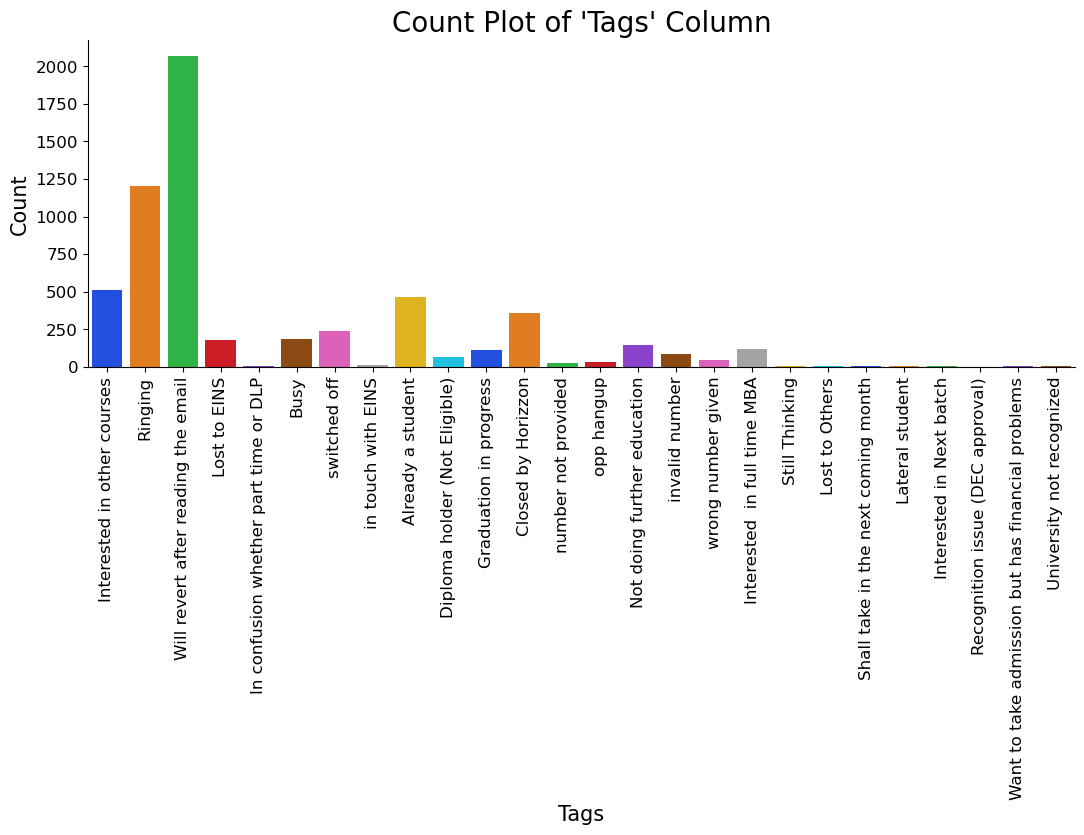

In [34]:
sns.catplot(data = cat_df, x = 'Tags', kind = 'count', palette = 'bright', aspect = 3, height=4)
plt.title("Count Plot of 'Tags' Column", fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=12)
plt.xlabel("Tags", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

 - From the above plot, we can infer that the most frequent response is 'Will revert after reading the email' followed by the response 'Ringing'. That means the leads are busy with their scedules and less likely to respond. But, there are chances of converting them in later time.
 - As the most frequent reponse is 'Will revert after reading the email', let's imput the null values in 'Tags' column with this response. 

In [35]:
# By taking the inferences from Countplot, we can say that imputing missing values with the most frequent value i.e., mode is advisable.
mod=leads_df['Tags'].mode()[0]
leads_df['Tags'].fillna(mod, inplace=True)

In [36]:
miss_perc(leads_df)

Lead Profile                                    29.3182
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
How did you hear about X Education              23.8853
Specialization                                  15.5628
City                                            15.3680
Last Activity                                    1.1147
Lead Source                                      0.3896
Prospect ID                                      0.0000
Through Recommendations                          0.0000
Receive More Updates About Our Courses           0.0000
Tags                                             0.0000
Newspaper                                        0.0000
Update me on Supply Chain Content                0.0000
Get updates on DM Content                        0.0000
I agree to pay the amount through cheque         0.0000
A free copy of Mastering The Interview          

In [37]:
# Now, Let's consider 'Country' & 'City' columns

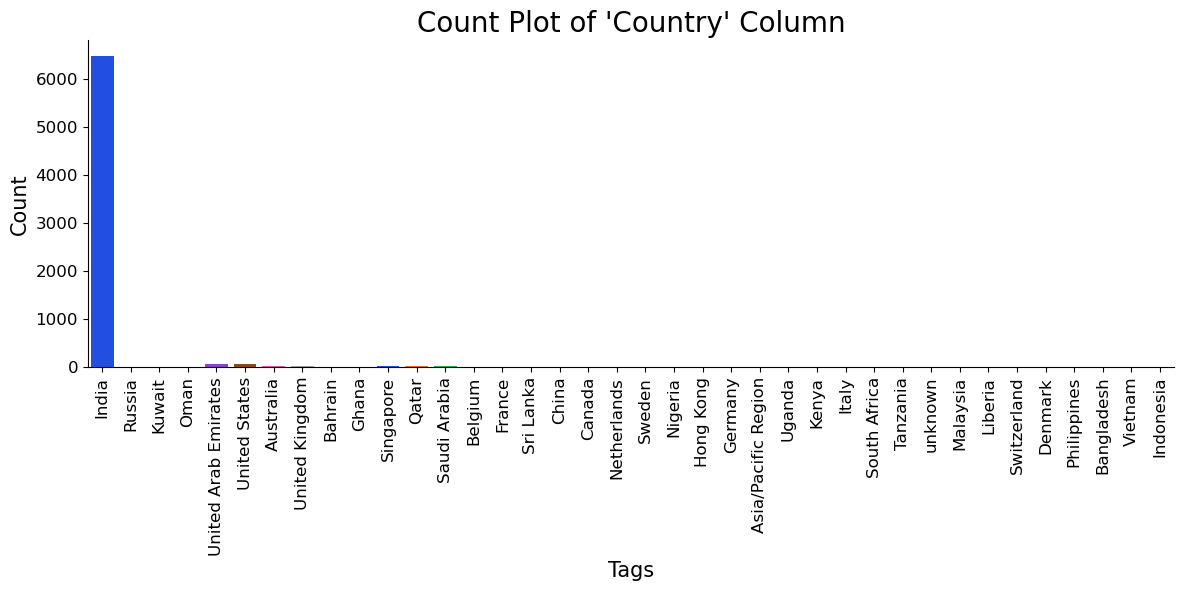

In [38]:
sns.catplot(data = cat_df, x = 'Country', kind = 'count', palette = 'bright', aspect = 3, height=4)
plt.title("Count Plot of 'Country' Column", fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=12)
plt.xlabel("Tags", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

#### Conclusions:
 - Country: 'Country' data is heavily skewed as 95% of the data is mapped as India.  Also, X-Education is an online teaching platform. So, The Country information isn't much useful as potential leads can be online despite their Country. Let's drop this column from analysis. 

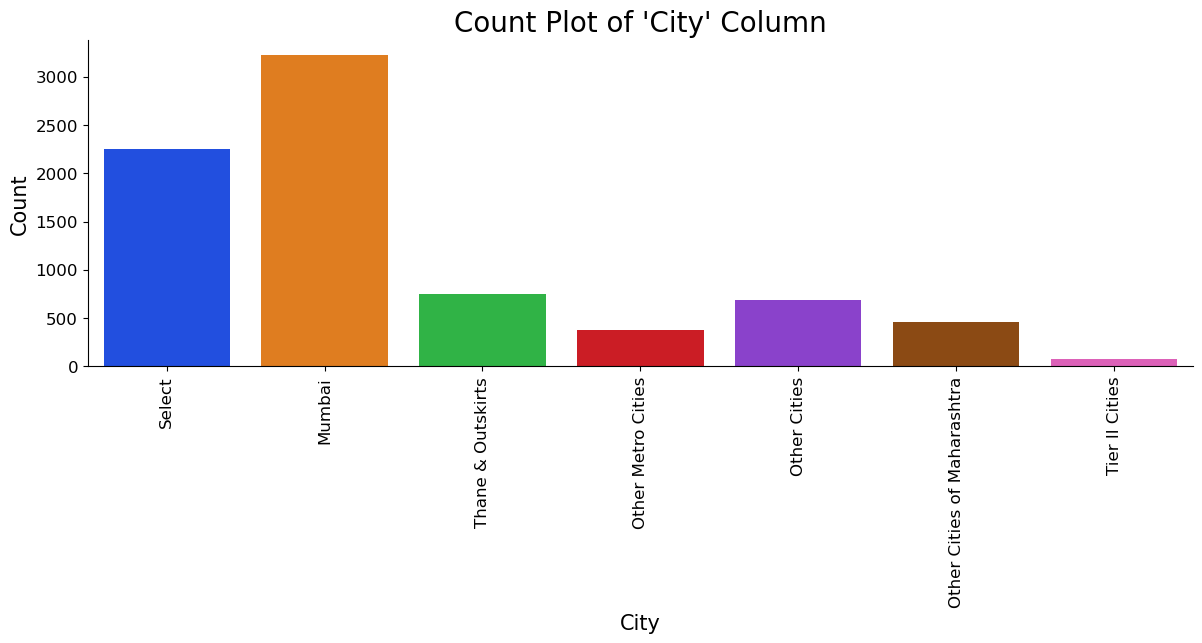

In [39]:
sns.catplot(data = cat_df, x = 'City', kind = 'count', palette = 'bright', aspect = 3, height=4)
plt.title("Count Plot of 'City' Column", fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=12)
plt.xlabel("City", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

#### Conclusions:
 - City: From the above count plot, we can say that most of the leads are from Mumbai. But, many of the leads have not selected any city from the options. Also, 'city' column has around 15.368% 'NaN' values. That is around 40% of the data is unclear. We cannot impute with mode as it makes the whole data skewed. Similar to Country column, City data is also not required for Model building as X-Education is online platform. Let's drop the country column too.

In [40]:
# Dropping the 'Country' and 'City' columns.
leads_df.drop(['City','Country'],axis=1,inplace=True)

In [41]:
# Let's have a look on 'Last Activity' column and remove nulls.
leads_df[leads_df['Last Activity'].isnull()]['Tags'].value_counts()

Closed by Horizzon                     47
Will revert after reading the email    35
Ringing                                12
Interested in other courses             4
Lost to EINS                            2
number not provided                     1
Busy                                    1
Interested  in full time MBA            1
Name: Tags, dtype: int64

In [42]:
print(leads_df[(leads_df['Tags'] == 'Closed by Horizzon')]['Last Activity'].mode())
print(leads_df[(leads_df['Tags'] == 'Will revert after reading the email')]['Last Activity'].mode())
print(leads_df[(leads_df['Tags'] == 'Ringing')]['Last Activity'].mode())
print(leads_df[(leads_df['Tags'] == 'Interested in other courses')]['Last Activity'].mode())
print(leads_df[(leads_df['Tags'] == 'number not provided')]['Last Activity'].mode())
print(leads_df[(leads_df['Tags'] == 'Busy')]['Last Activity'].mode())
print(leads_df[(leads_df['Tags'] == 'Interested  in full time MBA')]['Last Activity'].mode())

0    Email Opened
Name: Last Activity, dtype: object
0    Email Opened
Name: Last Activity, dtype: object
0    Email Opened
Name: Last Activity, dtype: object
0    Email Opened
Name: Last Activity, dtype: object
0    SMS Sent
Name: Last Activity, dtype: object
0    SMS Sent
Name: Last Activity, dtype: object
0    Email Opened
Name: Last Activity, dtype: object


In [43]:
# Let's imput the null values in the 'Last Activity' column with relevant values which we have got from the above analysis.
leads_df.loc[(leads_df['Last Activity'].isnull()) & (leads_df['Tags'] == 'Closed by Horizzon'), 'Last Activity'] = 'Email Opened'
leads_df.loc[(leads_df['Last Activity'].isnull()) & (leads_df['Tags'] == 'Will revert after reading the email'), 'Last Activity'] = 'Email Opened'
leads_df.loc[(leads_df['Last Activity'].isnull()) & (leads_df['Tags'] == 'Ringing'), 'Last Activity'] = 'Email Opened'
leads_df.loc[(leads_df['Last Activity'].isnull()) & (leads_df['Tags'] == 'Interested in other courses'), 'Last Activity'] = 'Email Opened'
leads_df.loc[(leads_df['Last Activity'].isnull()) & (leads_df['Tags'] == 'Lost to EINS'), 'Last Activity'] = 'Email Opened'
leads_df.loc[(leads_df['Last Activity'].isnull()) & (leads_df['Tags'] == 'number not provided'), 'Last Activity'] = 'SMS Sent'
leads_df.loc[(leads_df['Last Activity'].isnull()) & (leads_df['Tags'] == 'Busy'), 'Last Activity'] = 'SMS Sent'
leads_df.loc[(leads_df['Last Activity'].isnull()) & (leads_df['Tags'] == 'Interested  in full time MBA'), 'Last Activity'] = 'Email Opened'
leads_df[leads_df['Last Activity'].isnull()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 30 columns]

In [44]:
# Now, let's go for 'Lead Source' column. 
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [45]:
# From the above information, there are 5 entries of 'google' and 2868 entries of 'Google'. 
# Let's combine both by replacing 'google' with 'Google'.
leads_df['Lead Source'].replace(to_replace = 'google', value = 'Google', inplace = True)

In [46]:
# Let's check it again
leads_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

Now, it's fine

In [47]:
# Let's impute 'NaN' in 'Lead Source' column with 'Google'
leads_df['Lead Source'].fillna(value="Google", inplace=True)

 #### It was given in the problem statement that many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

In [48]:
# Creating List of columns having word "Select" in them

cols_having_select_word=[]
for col in leads_df.columns:
    if len(leads_df[col].isin(['Select']).unique())>1:
        cols_having_select_word.append(col)
print(cols_having_select_word)

['Specialization', 'How did you hear about X Education', 'Lead Profile']


In [49]:
# Let's impute 'Select' & 'NaN' with 'Unspecified' for these 3 columns.
leads_df['Specialization'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
leads_df['How did you hear about X Education'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
leads_df['Lead Profile'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)

In [50]:
miss_perc(leads_df)

What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Prospect ID                                      0.0000
Magazine                                         0.0000
A free copy of Mastering The Interview           0.0000
I agree to pay the amount through cheque         0.0000
Lead Profile                                     0.0000
Get updates on DM Content                        0.0000
Update me on Supply Chain Content                0.0000
Tags                                             0.0000
Receive More Updates About Our Courses           0.0000
Through Recommendations                          0.0000
Digital Advertisement                            0.0000
Newspaper                                        0.0000
X Education Forums                               0.0000
Newspaper Article                                0.0000
Search                                           0.0000
Lead Number                                     

In [51]:
# Now, let's go for 'What matters most to you in choosing a course' column. 
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

 - The most frequent answer is 'Better Career Prospects'. Null values present in this column can be imputed with this.

In [52]:
# Now, let's go for 'What is your current occupation' column. 
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

 - The most frequent answer is 'Unemployed'. Null values present in this column can be imputed with this.

In [53]:
# Let's impute null values present in the above columns with mode
se_mode = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
leads_df[['What matters most to you in choosing a course', 'What is your current occupation']] = se_mode.fit_transform(leads_df[['What matters most to you in choosing a course', 'What is your current occupation']])

In [54]:
miss_perc(leads_df)

Prospect ID                                     0.0000
Lead Number                                     0.0000
A free copy of Mastering The Interview          0.0000
I agree to pay the amount through cheque        0.0000
Lead Profile                                    0.0000
Get updates on DM Content                       0.0000
Update me on Supply Chain Content               0.0000
Tags                                            0.0000
Receive More Updates About Our Courses          0.0000
Through Recommendations                         0.0000
Digital Advertisement                           0.0000
Newspaper                                       0.0000
X Education Forums                              0.0000
Newspaper Article                               0.0000
Magazine                                        0.0000
Search                                          0.0000
What matters most to you in choosing a course   0.0000
What is your current occupation                 0.0000
How did yo

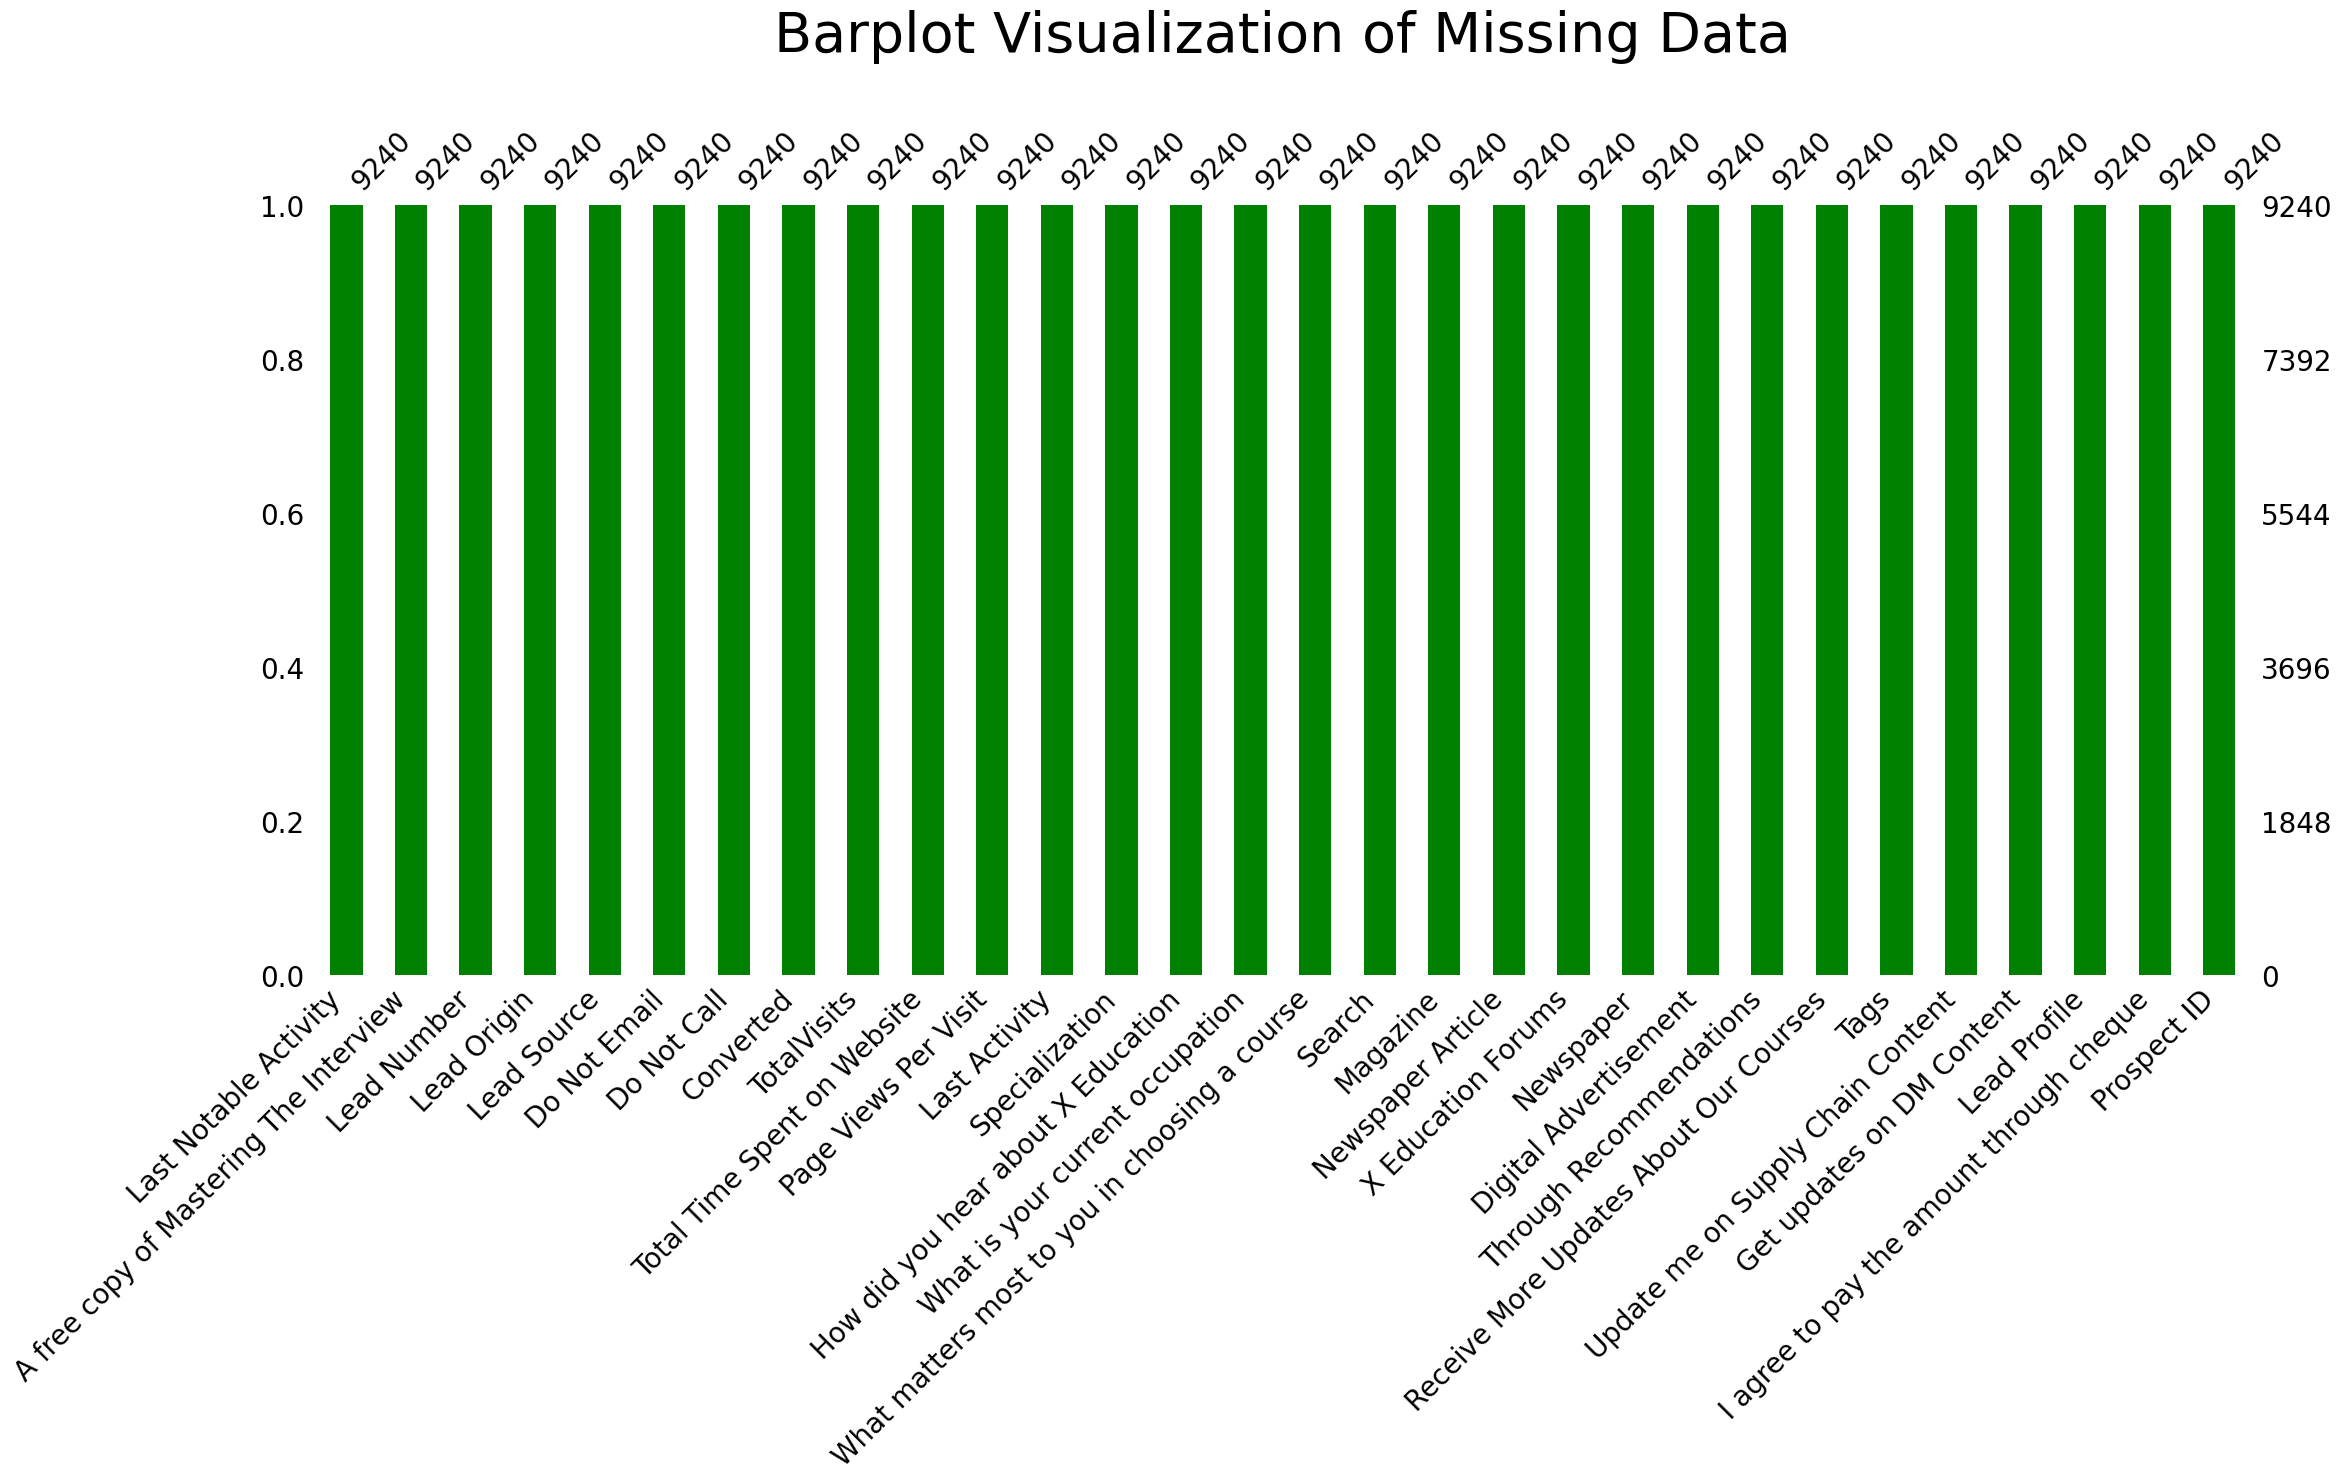

In [55]:
# Visualizing the missing data within the Appliction Data
ms.bar(leads_df, color = ('green'), sort = 'descending', fontsize=20)
plt.title('Barplot Visualization of Missing Data\n', fontsize=40)
plt.show()
# The height of the bar indicates how complete that column is.

### Missing Value Treatment was done with this.

## 4. Categorical Attributes - Analysis:

#### Let's check if any other unwanted columns can be dropped.

In [56]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [57]:
# Let's combile low frequency activities and replace them with 'Others'
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

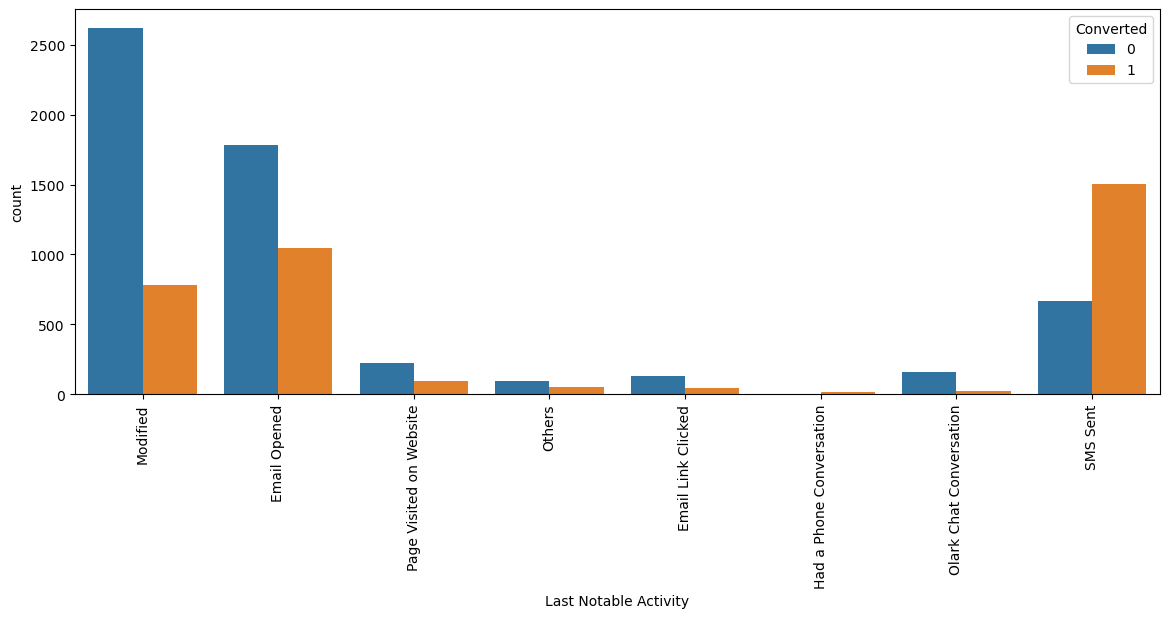

In [58]:
# Visualizing 'Last Notable Activity' based on Converted value.
plt.figure(figsize = (14,5))
ax=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

 -  Conversion rate of Leads by the Sales Team whose 'Last Notable Activity' as 'SMS Sent' is high. But, it doesn't help us in any way.
 - 'Last Notable Activity' is an intermediate column which is an update while the sales team is in touch with the lead. 
 -  This info isn't availabe before the Sales Team get in touch with them. So, let's drop it.

#### 4.1: "Prospect ID" & "Lead Number" columns indicate the ID number of the leads and have all unique values. So, they can be dropped.

In [59]:
leads_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

In [60]:
new_cat_cols = leads_df.dtypes[~(leads_df.dtypes == 'int64') & ~(leads_df.dtypes == 'float64')].keys()
new_cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [61]:
new_cat_df = leads_df[new_cat_cols]
new_cat_df.nunique()

Lead Origin                                       5
Lead Source                                      20
Do Not Email                                      2
Do Not Call                                       2
Last Activity                                    17
Specialization                                   19
How did you hear about X Education               10
What is your current occupation                   6
What matters most to you in choosing a course     3
Search                                            2
Magazine                                          1
Newspaper Article                                 2
X Education Forums                                2
Newspaper                                         2
Digital Advertisement                             2
Through Recommendations                           2
Receive More Updates About Our Courses            1
Tags                                             26
Update me on Supply Chain Content                 1
Get updates 

 - From the above data, it's clear that the columns 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content' and 'I agree to pay the amount through cheque' have only one unique value. 
 - These columns are of no use for our Data Model as they have only one kind of response. So, let's drop them.

#### 4.2: Dropping the columns which have only one unique value.

In [62]:
leads_df.drop(['Magazine', 'Receive More Updates About Our Courses', 
               'Update me on Supply Chain Content', 'Get updates on DM Content',
               'I agree to pay the amount through cheque'],axis=1,inplace=True)

#### Let's check the Skewness in Categorical Columns.

In [63]:
new_cat_cols = leads_df.dtypes[~(leads_df.dtypes == 'int64') & ~(leads_df.dtypes == 'float64')].keys()
new_cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'A free copy of Mastering The Interview'],
      dtype='object')

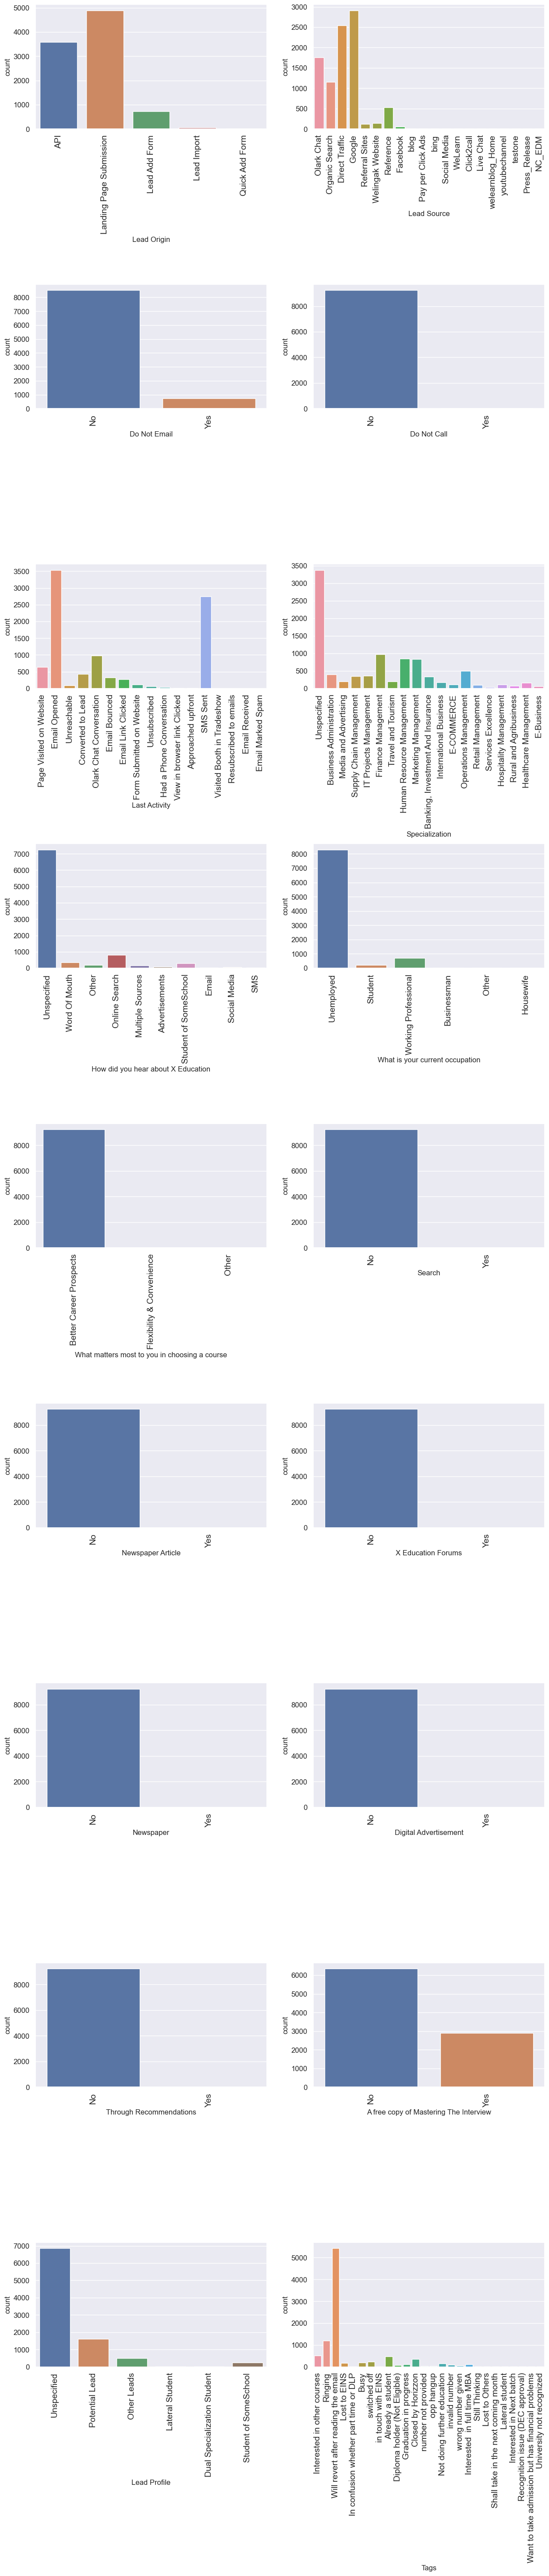

In [64]:
new_cat_cols1 = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Profile','Tags']
plt.figure(figsize=(15,70))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.25)
for i in enumerate(new_cat_cols1):
    plt.subplot(9 , 2, i[0]+1)
    sns.countplot(i[1],data=leads_df) 
    plt.xticks(rotation=90, fontsize = 14)
    plt.yticks(fontsize = 12)
plt.show()

#### Observations: 
1. The following columns have the Data which is highly skewed. So, let's drop them.

 - 'Do Not Call',
 - 'Search',
 - 'Newspaper Article',
 - 'X Education Forums',
 - 'Newspaper',
 - 'Newspaper Article'
 - 'Digital Advertisement',
 - 'Through Recommendations'
 - 'What matters most to you in choosing a course'
 - 'Tags': 'Tags' are created by the sales team based on the current status of the lead after they contact them. This wont be available before the lead is being contacted, hence not useful for modelling. So, we let's drop this column even.
2. "A free copy of Mastering The Interview" is a redundant variable. So, we shall include this also to the list of dropping columns.
3. 'Lead Profile', 'How did you hear about X Education' is unspecified by most of the Leads. It's not useful for model building.

#### 4.3: Dropping the columns which have only skewed data and redundant.

In [65]:
leads_df.drop(['Do Not Call','Search',
               'Newspaper Article',
               'X Education Forums',
               'Newspaper','Digital Advertisement',
               'Through Recommendations',
               'A free copy of Mastering The Interview', 'Tags', 'Lead Profile', 'What matters most to you in choosing a course', 'How did you hear about X Education' ],axis=1,inplace=True)

In [66]:
leads_df.nunique()

Lead Origin                           5
Lead Source                          20
Do Not Email                          2
Converted                             2
TotalVisits                          41
Total Time Spent on Website        1731
Page Views Per Visit                114
Last Activity                        17
Specialization                       19
What is your current occupation       6
dtype: int64

## 5. Exploratory Data Analysis

### 5.1: Checking for Data Imbalance in 'Converted' Variable

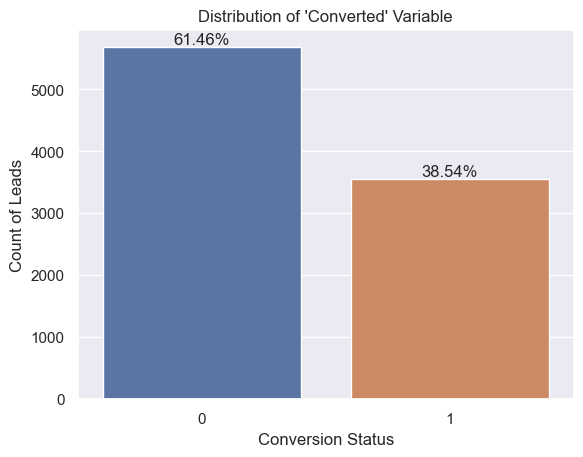

In [67]:
# 'Converted' is the target variable which indcates whether a lead has been successfully turned out as Potential Lead (converted (1)) or not (0).
ax = sns.countplot(leads_df.Converted)
plt.xlabel("Conversion Status")
plt.ylabel("Count of Leads")
plt.title("Distribution of 'Converted' Variable")
total = len(leads_df['Converted'])

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()


#### Observation: 
 - Successful lead conversion rate is just 38.54%

In [68]:
# Let's define a Reusable function to create countplot for Univariate Analysis-Categorical Columns
def uni_countplot(column,  log_y=False, rot_ticks=False):
    plt.figure(figsize = [10,7])
    palt = sns.color_palette("bright")
    
    plt.title("Count plot of {}".format(column), color='red', fontweight=15, fontsize=15)
    ax1 = sns.countplot(x = column, data = leads_df, order = sorted(leads_df[column].unique(), reverse = True), palette = palt)
    total = len(leads_df[column])
    
            
    # We can use Logarithmic Scale if the plot isn't readable
    if log_y:
        plt.yscale('log')
        plt.ylabel('Count on log Scale')
        

    # Let's rotate x-ticks whenever it is required.
    if rot_ticks:
        plt.xticks(rotation=90)
        plt.xlabel('')

    for p in ax1.patches: 
        percentage='{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax1.annotate(percentage,(x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

## 5.1: Univariate Analysis - Categorical Columns

###### Lead Origin:

In [69]:
new_cat_cols = leads_df.dtypes[~(leads_df.dtypes == 'int64') & ~(leads_df.dtypes == 'float64')].keys()
new_cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation'],
      dtype='object')

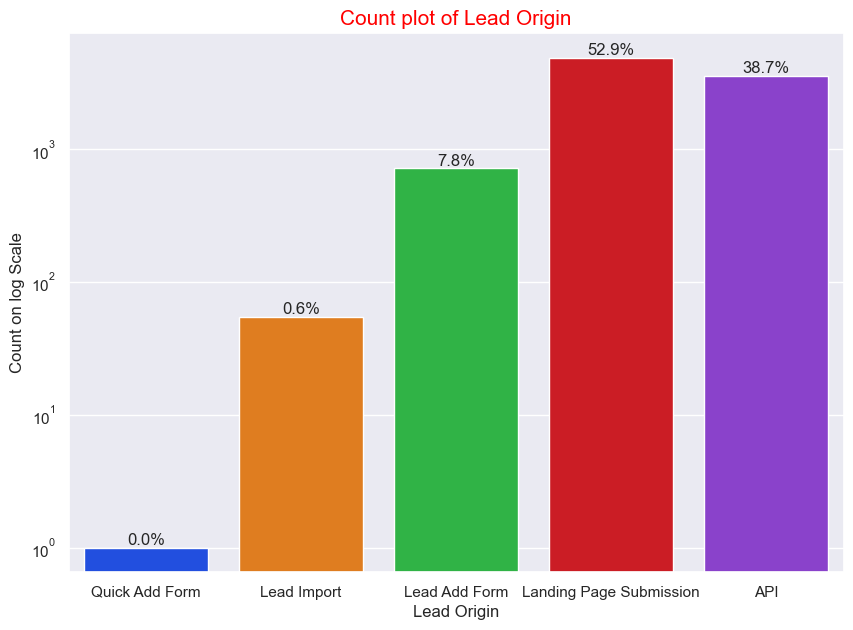

In [70]:
uni_countplot('Lead Origin', True)

###### Lead Source:

In [71]:
leads_df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [72]:
# Let's group all the low frequency values and replace them with 'Others'.
leads_df['Lead Source'] = leads_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

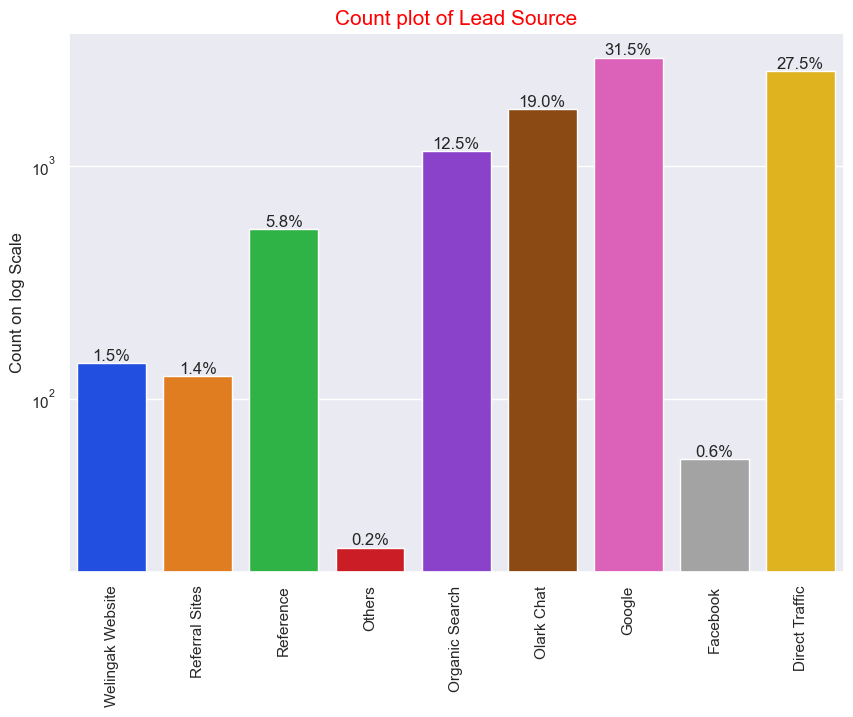

In [73]:
uni_countplot('Lead Source', True, True)

#### Do Not Email:

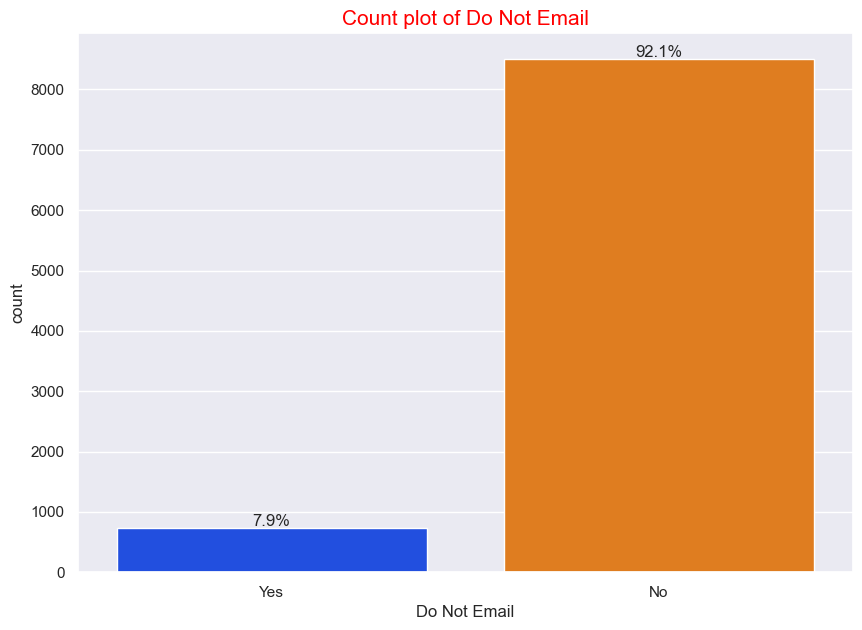

In [74]:
uni_countplot('Do Not Email')

###### Last Activity:

In [75]:
leads_df['Last Activity'].value_counts()

Email Opened                    3538
SMS Sent                        2747
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [76]:
# Let's group all the low frequency values and replace them with 'Others'.
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

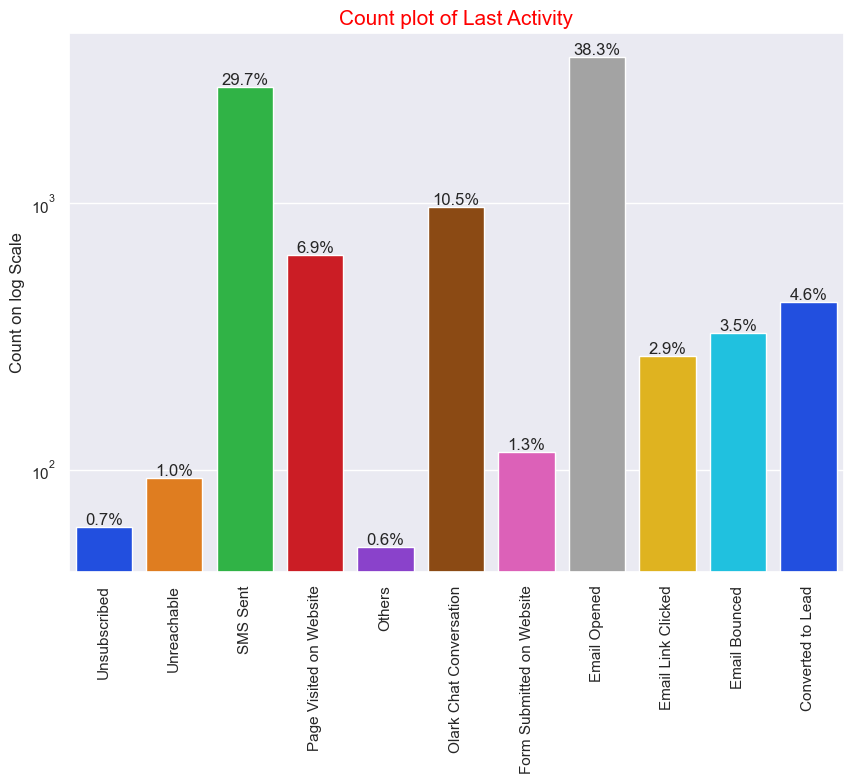

In [77]:
uni_countplot('Last Activity', True, True)

###### Specialization:

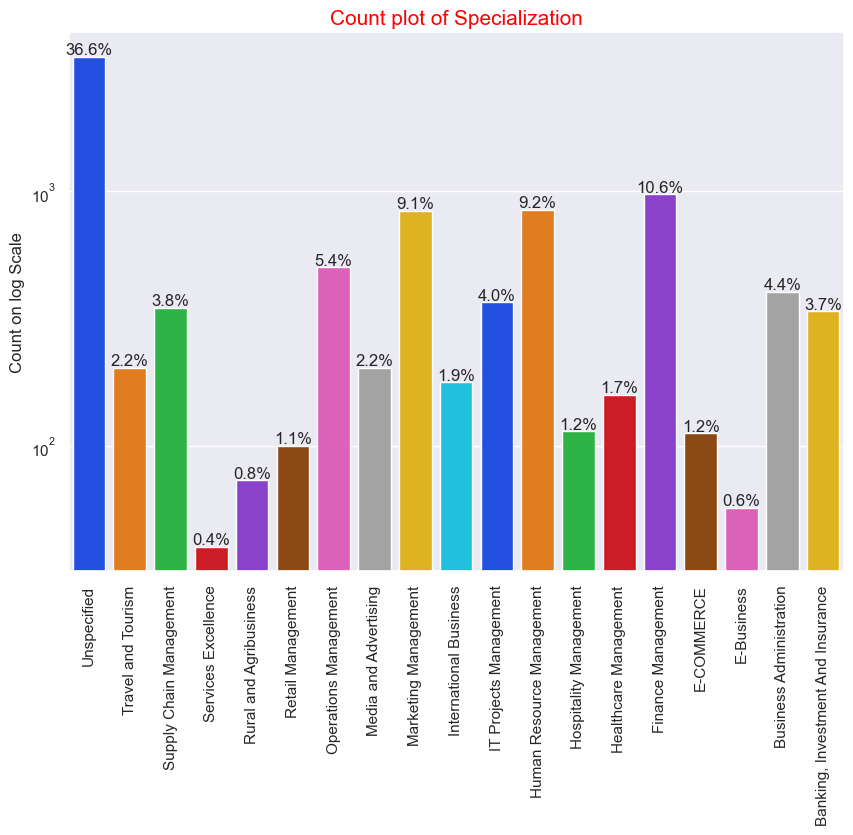

In [78]:
uni_countplot('Specialization', True, True)

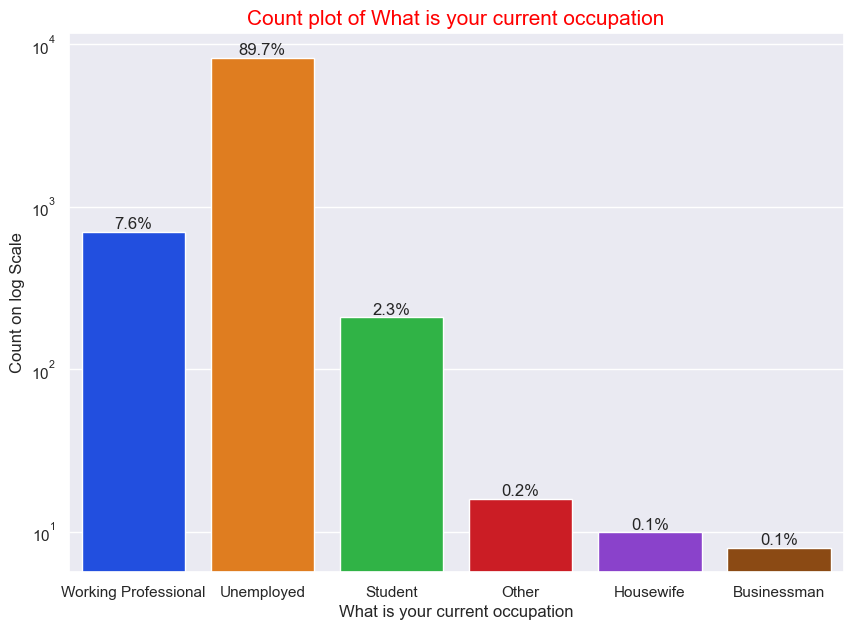

In [79]:
uni_countplot('What is your current occupation', True)

#### Observations from Univariate Analysis:
 - Lead Origin: The highest percentage of Leads are from 'Landing Page Submission'(52.9%) followed by 'API'(38.7%)
 - Lead Source: The highest percentage of Leads are from 'Google'(31.5%) followed by 'API'(27.5%)
 - Do Not Email: 92.1% of the leads opted for 'Do Not Email' and they wanted no mails further
 - Last Activity: Major Last Activities recorded are 'Email Opened'(38.3%) and 'SMS Sent'(29.7%)
 - What is your current occupation: As per the above countplot, 89.7% of the leads are Unemployed

## 5.2: Bivariate Analysis - Categorical Columns

In [80]:
# Let's define a Reusable function to create a countplot for Bivariate Analysis
def bi_countplot(column, hue_column, log_y=False, rot_ticks=False, patches = True):
    plt.figure(figsize = [10,7])
    palt = sns.color_palette("bright")

    ax2 = sns.countplot(x = column, data = leads_df, 
                  order = sorted(leads_df[column].unique()), palette = palt,
                  hue = hue_column, hue_order = sorted(leads_df[hue_column].unique(), reverse = True))
    total = len(leads_df[column])
    plt.legend(["Yes","No"],title = "Converted")
    
   # We can use Logarithmic Scale if the plot isn't readable
    if log_y:
        plt.yscale('log')
        plt.ylabel("Count on log scale")
    
    # Let's rotate x-ticks whenever it is required.
    if rot_ticks:
        plt.xticks(rotation=90, fontsize = 12)
        plt.xlabel('')
        
    if patches:
        for p in ax2.patches:
            percentage='{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width()/2
            y = p.get_height()
            ax2.annotate(percentage,(x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    plt.tight_layout(pad = 4)
    plt.show()

In [81]:
# Let's define another Reusable function to create a countplot for Bivariate Analysis
def bi_countplot1(column, log_y=False, rot_ticks=False, patches = True, hue_column = 'Converted'):
    plt.figure(figsize = [11, 12])
    palt = sns.color_palette("bright")
    plt.xticks(fontsize = 12)
    total = len(leads_df[column])

    # First Subplot
    plt.subplot(2,1,1)
    plt.title("Distribution Plot of {}\n".format(column),color="blue", fontweight=15, fontsize=16)
    ax3 = sns.countplot(x = column, data = leads_df, 
                  order = sorted(leads_df[column].unique()), palette = palt,
                  hue = hue_column, hue_order = sorted(leads_df[hue_column].unique(), reverse = True))
    plt.ylabel('Count of Leads', fontsize = 10)
    plt.legend(["Yes","No"],title = "Converted", loc = 'upper right')
    
   # We can use Logarithmic Scale if the plot isn't readable
    if log_y:
        plt.yscale('log')
        plt.ylabel("Count on log scale", fontsize= 15)
    
    # Let's rotate x-ticks whenever it is required.
    if rot_ticks:
        plt.xticks(rotation=90, fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.xlabel('')
        
    if patches:
        for p in ax3.patches:
            percentage='{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width()/2
            y = p.get_height()
            ax3.annotate(percentage,(x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
            
    # Second Subplot
    plt.subplot(2,1,2)
    plt.title("% Converted Leads assessment in each value of {}\n".format(column), color="blue", fontsize = 16)
    ax4 = sns.countplot(x = column, data = leads_df, 
                  order = sorted(leads_df[column].unique()), palette = palt,
                  hue = hue_column, hue_order = sorted(leads_df[hue_column].unique(), reverse = True))
    plt.ylabel('Count of Leads', fontsize = 10)
    plt.legend(["Yes","No"],title = "Converted", loc = 'upper right')
    
   # We can use Logarithmic Scale if the plot isn't readable
    if log_y:
        plt.yscale('log')
        plt.ylabel("Count on log scale", fontsize = 15)
    
    # Let's rotate x-ticks whenever it is required.
    if rot_ticks:
        plt.xticks(rotation=90, fontsize = 20)
        plt.xlabel('')
    
    all_heights = [[p.get_height() for p in bars] for bars in ax4.containers]
    for bars in ax4.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax4.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points')
            
    plt.tight_layout(pad = 4)
    plt.show()

In [82]:
new_cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation'],
      dtype='object')

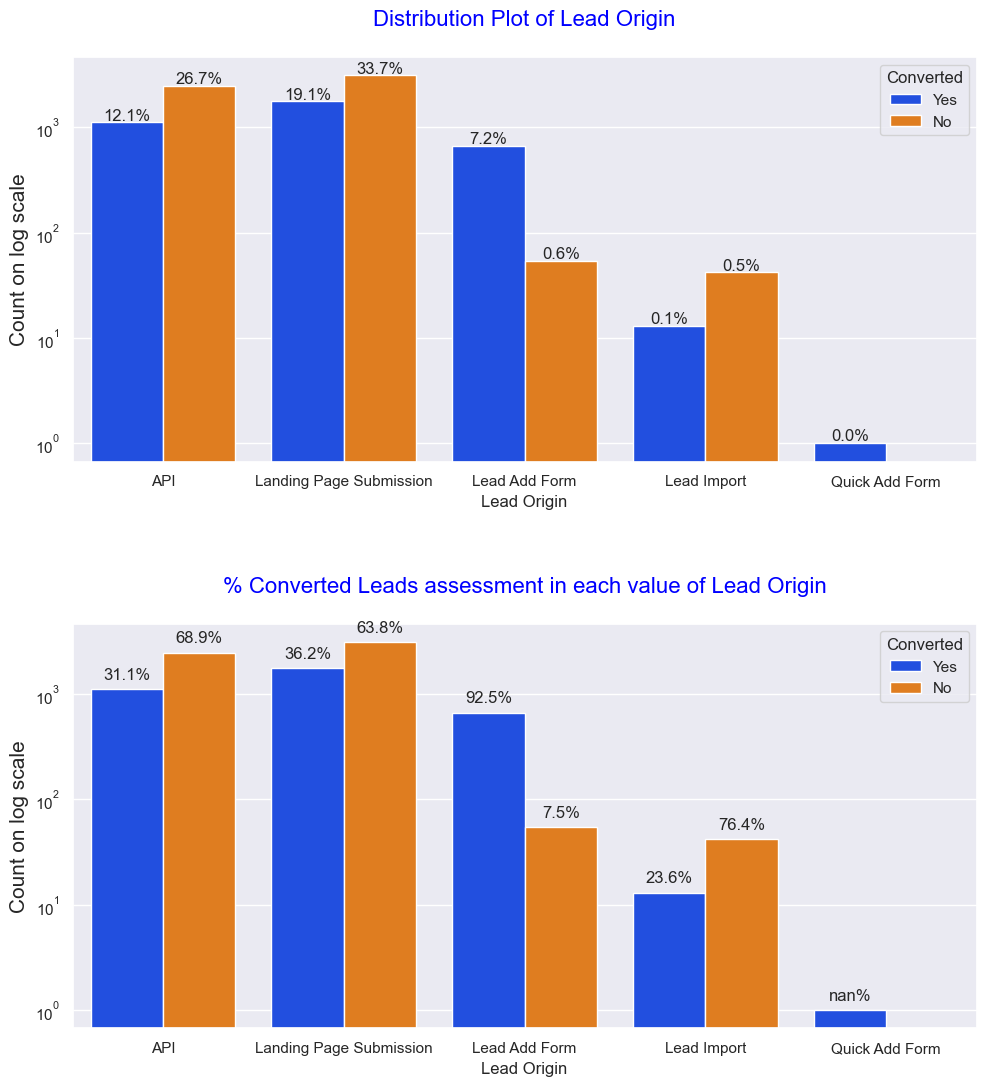

In [83]:
bi_countplot1('Lead Origin', True, False, True )

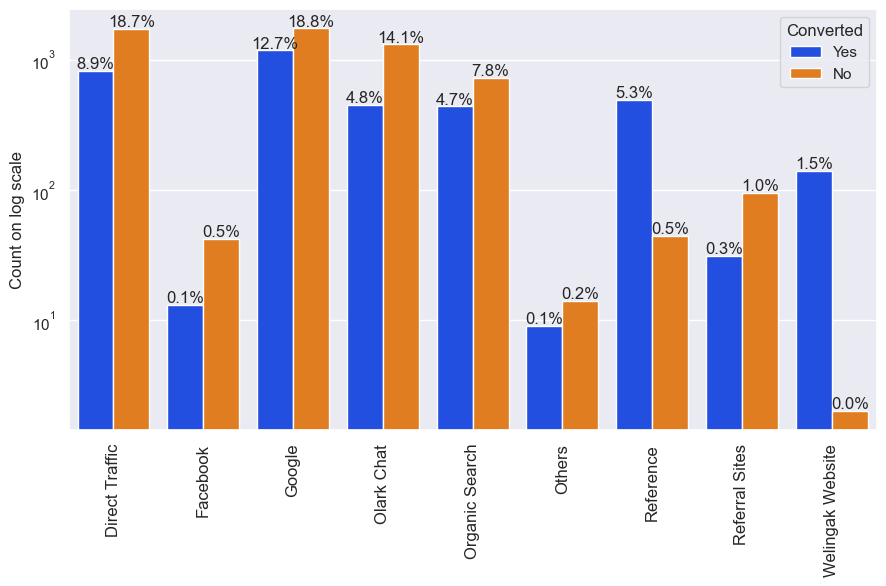

In [84]:
bi_countplot('Lead Source', 'Converted', True, True, True )

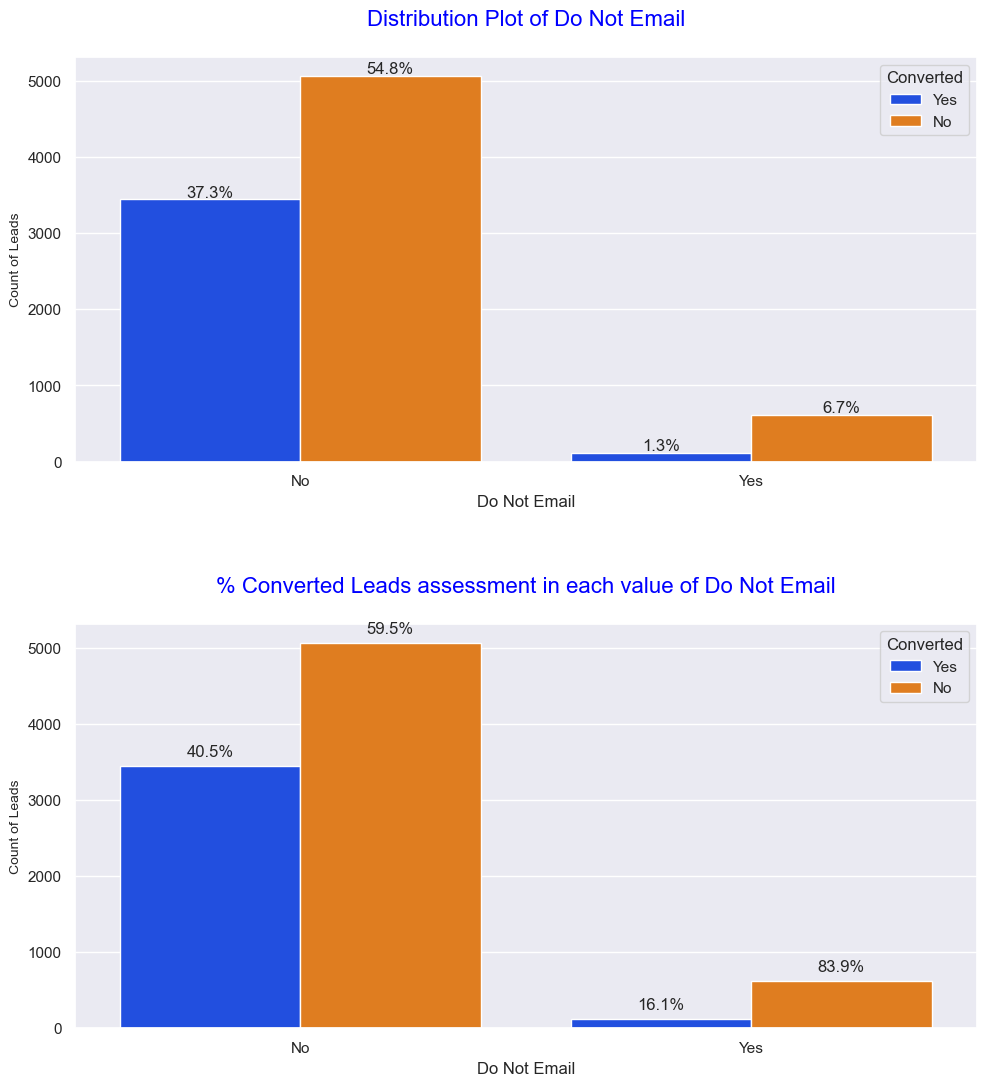

In [85]:
bi_countplot1('Do Not Email', False, False, True )

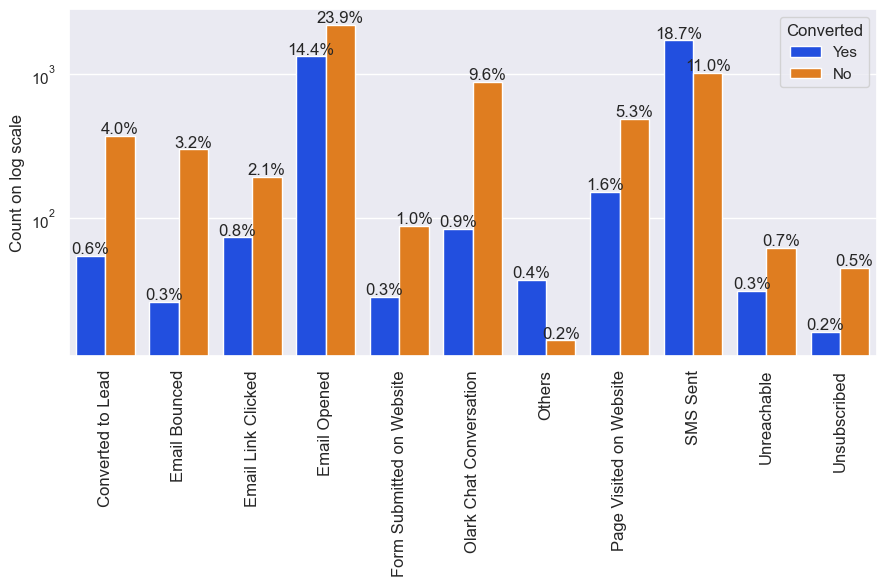

In [86]:
bi_countplot('Last Activity', 'Converted', True, True, True )

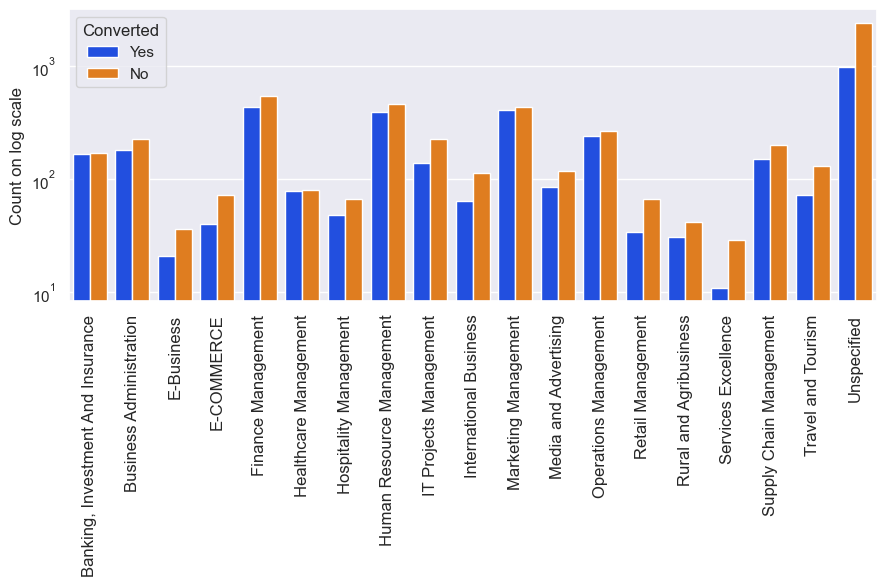

In [87]:
bi_countplot('Specialization', 'Converted', True, True, False )

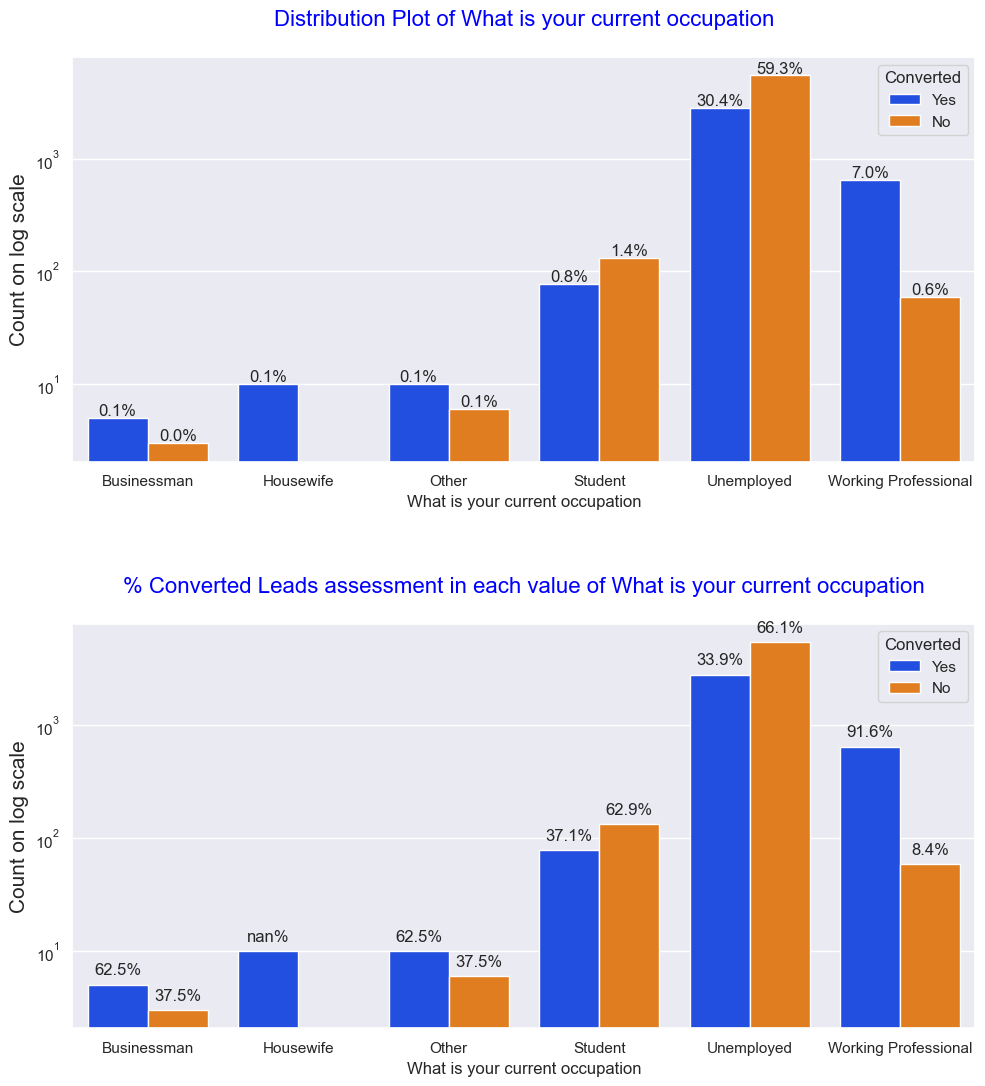

In [88]:
bi_countplot1('What is your current occupation', True, False, True )

#### Observations:
 - Lead Origin: The highest leads are from "Landing Page Submission" followed by "API" Origin. Also, 36.2% of total leads from 'Land Page Submission' have been converted and 31.1% of the leads from 'API' have been successfully converted. But, theconversion rate is high for the category 'Lead Add Form'. Around 92.5% of the leads from this category have been successfully converted.
 - Lead Source: The highest leads are in "Direct Traffic" and "Google" Categories. But, Conversion rate is high in 'Welingak Website' and 'Reference' categories.
 - Do not email: 92% of the leads opted for not getting emails. Though they opted for no emails, 40.5% of these people were successfully converted.
 - Last Activity: The number of Hot leads is higher in 'SMS Sent' and in 'Email Opened' category. Conversion rate is more in 'SMS Sent' category.
 - Specialization: Most of the leads didn't specify their Specialization. Most of the remaining are from Marketing Managemt, HR Management & Finance Management.
 - Occupation: Though most of the leads are under 'Unemployed' category, Businessmen and Working Professionals can be easily converted. Out of all the 3, Conversion rate of Working Professionals is the highest.

## 6. Numerical Attributes - Analysis:

In [89]:
new_num_cols

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [90]:
num_list = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

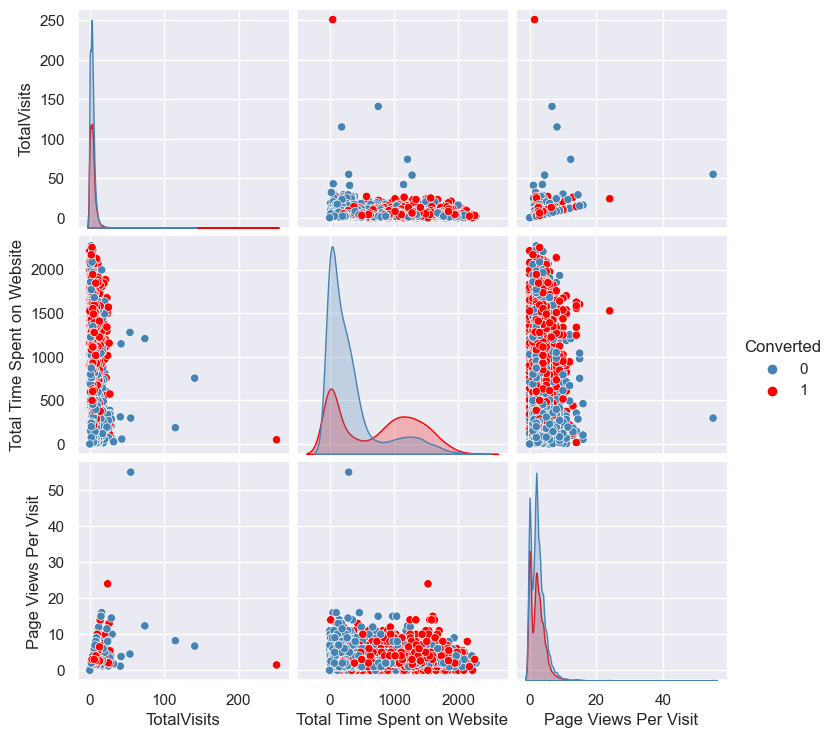

In [91]:
sns.pairplot(leads_df, vars = num_list,
             diag_kind = 'kde', hue = 'Converted', palette =['steelblue', 'red'])
plt.show()

In [92]:
num_list

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

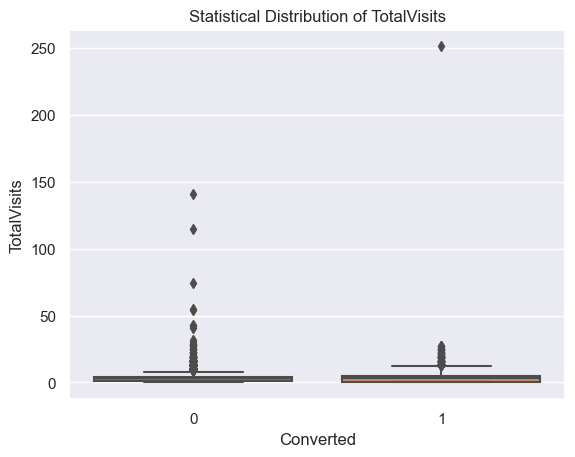

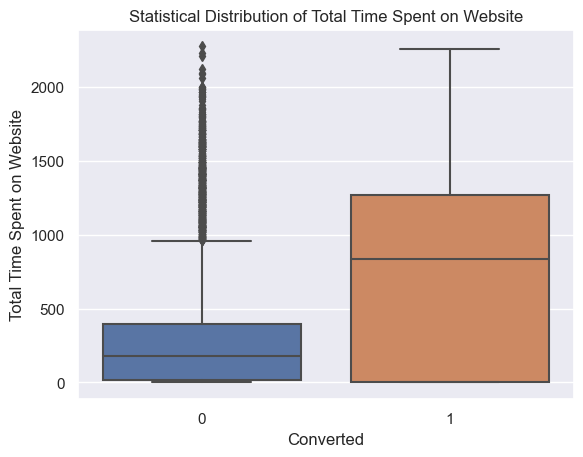

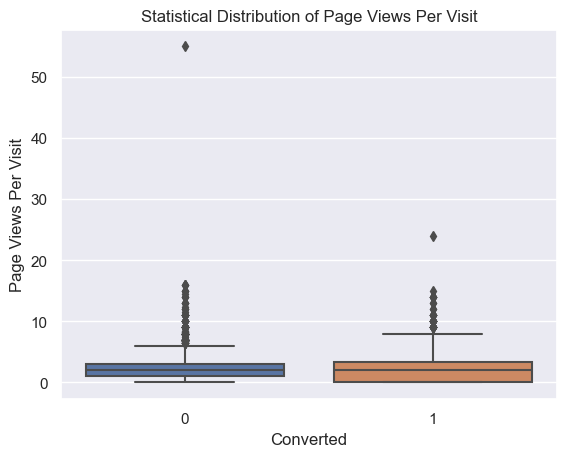

In [93]:
# Boxplot for Bivariate Analysis of Numerical Variables
for i in num_list:
    sns.boxplot(y = leads_df[i], x = 'Converted', data = leads_df)
    plt.title("Statistical Distribution of "+i)
    plt.show()

#### Insights:
 - Past Leads who spend more time on Website are successfully converted than those who spend less time.

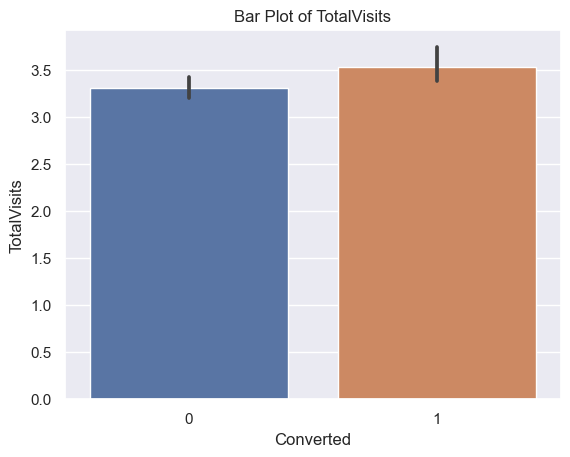

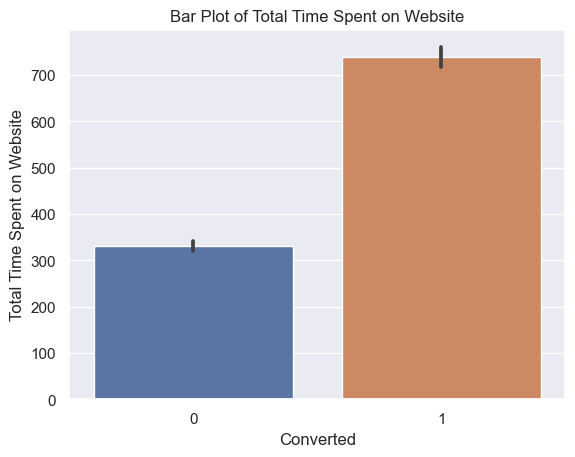

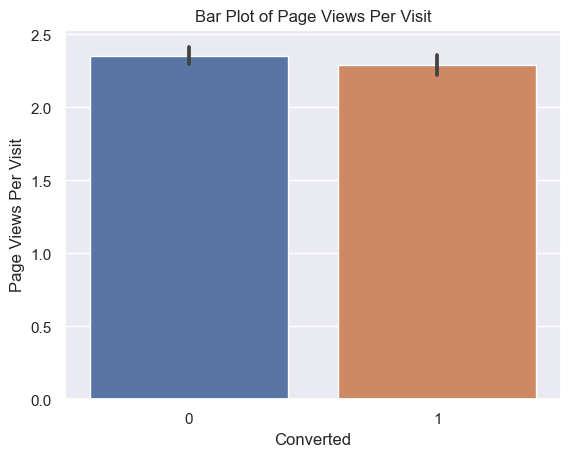

In [94]:
# Boxplot for Bivariate Analysis of Numerical Variables
for i in num_list:
    sns.barplot(y = leads_df[i], x = 'Converted', data = leads_df)
    plt.title("Bar Plot of "+i)
    plt.show()

#### Observation:
 - Overall conversion rate for all numerical variables is high

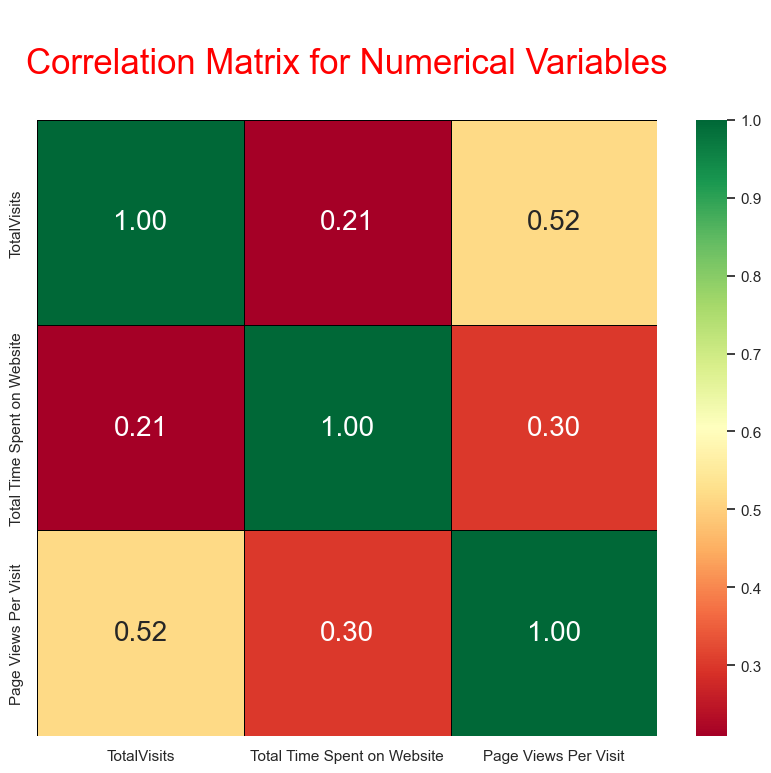

In [95]:
# Checking correlation among numeric variables using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(leads_df[num_list].corr(), cmap="RdYlGn", annot=True, 
                 annot_kws = {'size':20, 'fontweight': 40}, 
                linewidth = 0.5, linecolor ='black', fmt='.2f')
plt.title("\nCorrelation Matrix for Numerical Variables\n", fontsize = 25, fontweight = 20, color = 'red')
plt.show()

 - We can clearly see that some of the potential outliers in our data. Also, the data seems to be skewed for the different classes.

## 7. Outlier Analysis + Treatment:

In [96]:
# Let's define a Reusable function for capping & flooring
def treat_outlier(col):
    
    #calculating quartile deviation
    q1 = np.quantile(leads_df[col], q = 0.25)
    q3 = np.quantile(leads_df[col], q = 0.75)
    
    #calculating inter-quartile range
    iqr = q3-q1
    
    #calculating lower and upper bound
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    # Capping:
    leads_df[col] = np.where(leads_df[col] > upper_bound, upper_bound,leads_df[col])

    # Flooring:
    leads_df[col] = np.where(leads_df[col] < lower_bound, lower_bound,leads_df[col])

######  Total Visits:

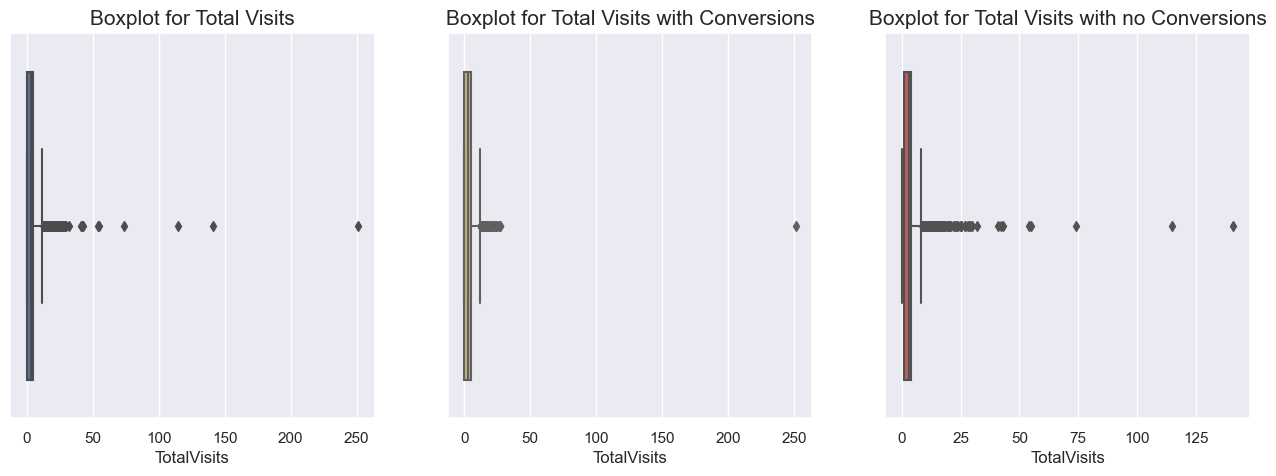

In [97]:
# Total Visits
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title("Boxplot for Total Visits", fontsize=15)
sns.boxplot(data = leads_df, x = 'TotalVisits')
plt.subplot(1,3,2)
plt.title("Boxplot for Total Visits with Conversions", fontsize=15)
sns.boxplot(data = leads_df.query("Converted == 1"), x = 'TotalVisits', hue = 'Converted', color = 'y')
plt.subplot(1,3,3)
plt.title("Boxplot for Total Visits with no Conversions", fontsize=15)
sns.boxplot(data = leads_df.query("Converted == 0"), x = 'TotalVisits', hue = 'Converted', color = 'r')
plt.show()

 - It's clear from the boxplots that 'Total Visits' data has outliers(high extreme values)

In [98]:
# Checking percentile values for "Total Visits"
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9240.0000
mean       3.3942
std        4.8367
min        0.0000
5%         0.0000
25%        0.0000
50%        3.0000
75%        5.0000
90%        7.0000
95%       10.0000
99%       17.0000
max      251.0000
Name: TotalVisits, dtype: float64

In [99]:
treat_outlier('TotalVisits')

######  Total Time Spent on Website:

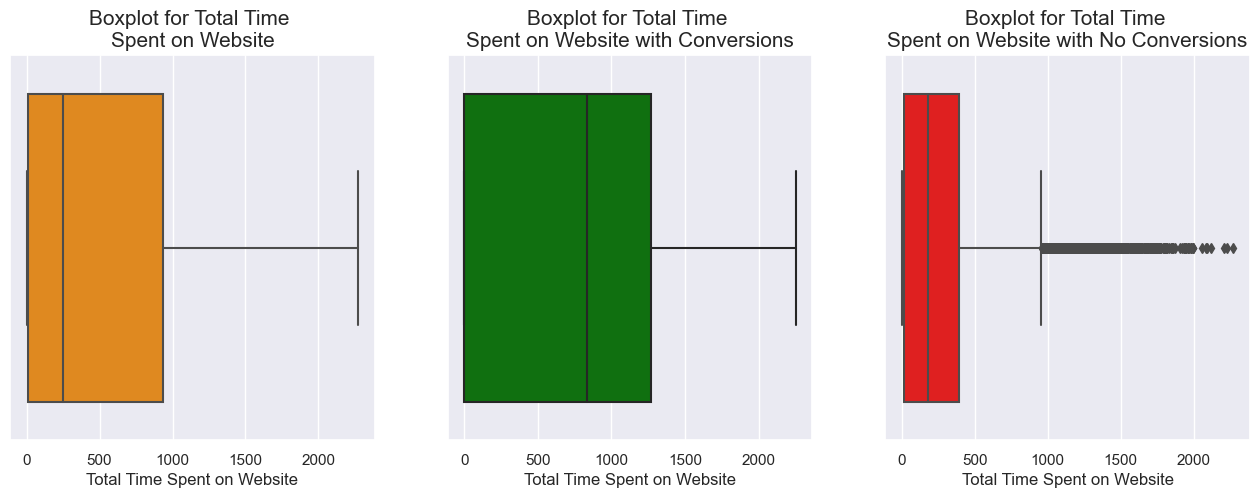

In [100]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title("Boxplot for Total Time \nSpent on Website",  fontsize=15)
sns.boxplot(data = leads_df, x = 'Total Time Spent on Website', color = 'darkorange')
plt.subplot(132)
plt.title("Boxplot for Total Time \nSpent on Website with Conversions",  fontsize=15)
sns.boxplot(data = leads_df.query("Converted == 1"), x = 'Total Time Spent on Website', hue = 'Converted', color = 'green')
plt.subplot(133)
plt.title("Boxplot for Total Time \nSpent on Website with No Conversions",  fontsize=15)
sns.boxplot(data = leads_df.query("Converted == 0"), x = 'Total Time Spent on Website', hue = 'Converted', color = 'red')
plt.show()

 - Here, we can see some potential outliers in the case of "No Conversions". But, when we look data at the aggregate level the effect of "No Conversion" seems to be neutralized. This is because 'Conversion' class has almost no outliers as compared to "No Conversion" class. So, outlier treatment is not required.

######  Page Views Per Visit:

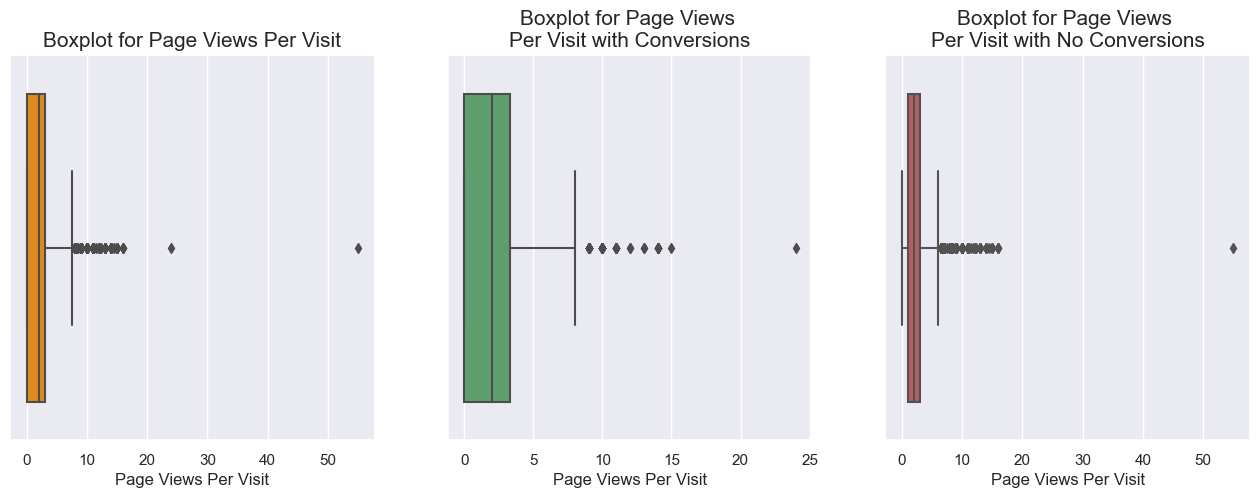

In [101]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title("Boxplot for Page Views Per Visit", fontsize=15)
sns.boxplot(data = leads_df, x = 'Page Views Per Visit', color = 'darkorange')
plt.subplot(132)
plt.title("Boxplot for Page Views \nPer Visit with Conversions", fontsize=15)
sns.boxplot(data = leads_df.query("Converted == 1"), x = 'Page Views Per Visit', hue = 'Converted', color = 'g')
plt.subplot(133)
plt.title("Boxplot for Page Views \nPer Visit with No Conversions", fontsize=15)
sns.boxplot(data = leads_df.query("Converted == 0"), x = 'Page Views Per Visit', hue = 'Converted', color = 'r')
plt.show()

 - We can also see some outliers here as well. So, outlier treatment is needed before proceeding with our analysis.

In [102]:
# Checking percentile values for "Total Visits"
leads_df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9240.0000
mean       2.3278
std        2.1643
min        0.0000
5%         0.0000
25%        0.0000
50%        2.0000
75%        3.0000
90%        5.0000
95%        6.0000
99%        9.0000
max       55.0000
Name: Page Views Per Visit, dtype: float64

In [103]:
treat_outlier('Page Views Per Visit')

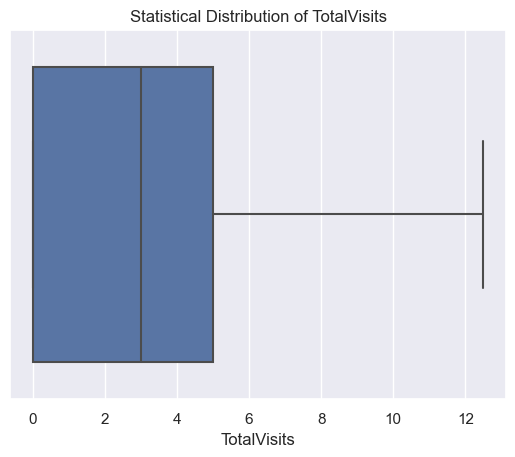

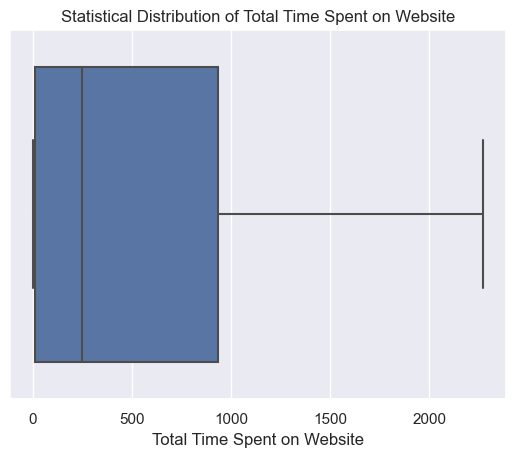

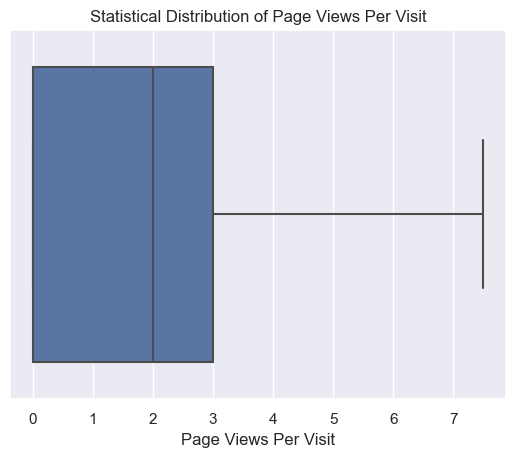

In [104]:
# Checking again for outliers
for i in num_list:
    sns.boxplot(leads_df[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.show()

In [105]:
#Checking again the detailed percentile values
leads_df.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.0000    9240.0000                    9240.0000   
mean      0.3854       3.2139                     487.6983   
std       0.4867       3.0051                     548.0215   
min       0.0000       0.0000                       0.0000   
10%       0.0000       0.0000                       0.0000   
25%       0.0000       0.0000                      12.0000   
50%       0.0000       3.0000                     248.0000   
75%       1.0000       5.0000                     936.0000   
90%       1.0000       7.0000                    1380.0000   
95%       1.0000      10.0000                    1562.0000   
99%       1.0000      12.5000                    1840.6100   
max       1.0000      12.5000                    2272.0000   

       Page Views Per Visit  
count             9240.0000  
mean                 2.2750  
std                  1.9178  
min                  0.0000  
10%                  0.0000  
25%                  0.0000  
50%                  2.0000  
75%                  3.0000  
90%                  5.0000  
95%                  6.0000  
99%                  7.5000  
max                  7.5000

 - Looking good now, The number of rows getting capped are quite high. This is also the reason that we are capping the data instead of deleting it.
 - Let's proceed to our next step 'Data Preparation'

## 8. Data Preparation:

### 8.1: Coverting Binary Variables('Yes'/'No') to ('1'/'0')

In [106]:
# Checking for Binary Variables
leads_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0       0.0000                            0                0.0000   
1       5.0000                          674                2.5000   
2       2.0000                         1532                2.0000   
3       1.0000                          305                1.0000   
4       2.0000                         1428                1.0000   

             Last Activity           Specialization  \
0  Page Visited on Website              Unspecified   
1             Email Opened              Unspecified   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead              Unspecified   

  What is your current occupation  
0                      Unemployed  
1                      Unemployed  
2                         Student  
3                      Unemployed  
4                      Unemployed

In [107]:
leads_df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [108]:
# 'Do Not Email' is the only variable to be mapped

# Defining the map function
def binary_mapping(x):
    return x.map({'Yes': 1, "No": 0})

In [109]:
# Applying the function to the lead YES/NO variable list
leads_df['Do Not Email'] = leads_df[['Do Not Email']].apply(binary_mapping)

In [110]:
leads_df['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [111]:
# Checking data types of columns
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   int64  
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9240 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9240 non-null   float64
 7   Last Activity                    9240 non-null   object 
 8   Specialization                   9240 non-null   object 
 9   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB


### 8.2: Dummy Variable Creation

In [112]:
leads_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0       0.0000                            0                0.0000   
1       5.0000                          674                2.5000   
2       2.0000                         1532                2.0000   
3       1.0000                          305                1.0000   
4       2.0000                         1428                1.0000   

             Last Activity           Specialization  \
0  Page Visited on Website              Unspecified   
1             Email Opened              Unspecified   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead              Unspecified   

  What is your current occupation  
0                      Unemployed  
1                      Unemployed  
2                         Student  
3                      Unemployed  
4                      Unemployed

In [113]:
# Getting a list of categorical columns foy creating dummies
dummy_cat_cols= leads_df.select_dtypes(include=['object']).columns
dummy_cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [114]:
# Renaming 'What is your current occupation' as it has long name.
leads_df.rename(columns ={'What is your current occupation': 'Current Occupation'},inplace = True)

In [115]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Current Occupation'],
      dtype='object')

In [116]:
# Getting dummies, dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source','Last Activity', 'Specialization','Current Occupation']], drop_first=True)
leads_df = pd.concat([leads_df, dummy],axis=1)
leads_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0       0.0000                            0                0.0000   
1       5.0000                          674                2.5000   
2       2.0000                         1532                2.0000   
3       1.0000                          305                1.0000   
4       2.0000                         1428                1.0000   

             Last Activity           Specialization Current Occupation  ...  \
0  Page Visited on Website              Unspecified         Unemployed  ...   
1             Email Opened              Unspecified         Unemployed  ...   
2             Email Opened  Business Administration            Student  ...   
3              Unreachable    Media and Advertising         Unemployed  ...   
4        Converted to Lead              Unspecified         Unemployed  ...   

   Specialization_Rural and Agribusiness  Specialization_Services Excellence  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   Specialization_Supply Chain Management  Specialization_Travel and Tourism  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Specialization_Unspecified  Current Occupation_Housewife  \
0                           1                             0   
1                           1                             0   
2                           0                             0   
3                           0                             0   
4                           1                             0   

   Current Occupation_Other  Current Occupation_Student  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   Current Occupation_Unemployed  Current Occupation_Working Professional  
0                              1                                        0  
1                              1                                        0  
2                              0                                        0  
3                              1                                        0  
4                              1                                        0  

[5 rows x 55 columns]

In [117]:
# We have created dummies for the below variables, so we can drop them
leads_df = leads_df.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization','Current Occupation'], axis=1)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

## 8.3: Test-Train Splitting:

In [118]:
# Putting feature variable to X
X=leads_df.drop('Converted', axis=1)

# Checking head of X
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0       0.0000                            0   
1             0       5.0000                          674   
2             0       2.0000                         1532   
3             0       1.0000                          305   
4             0       2.0000                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                0.0000                                    0   
1                2.5000                                    0   
2                2.0000                                    1   
3                1.0000                                    1   
4                1.0000                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  ...  \
0                           0                     0                   0  ...   
1                           0                     0                   0  ...   
2                           0                     0                   0  ...   
3                           0                     0                   0  ...   
4                           0                     0                   1  ...   

   Specialization_Rural and Agribusiness  Specialization_Services Excellence  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   Specialization_Supply Chain Management  Specialization_Travel and Tourism  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Specialization_Unspecified  Current Occupation_Housewife  \
0                           1                             0   
1                           1                             0   
2                           0                             0   
3                           0                             0   
4                           1                             0   

   Current Occupation_Other  Current Occupation_Student  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   Current Occupation_Unemployed  Current Occupation_Working Professional  
0                              1                                        0  
1                              1                                        0  
2                              0                                        0  
3                              1                                        0  
4                              1                                        0  

[5 rows x 49 columns]

In [119]:
# Putting response variable to y
y = leads_df['Converted']

# Checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [120]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [121]:
# Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 49)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 49)
 Shape of y_test is  :  (2772,)


## 8.4: Feature Scaling:

In [122]:
X_train.describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count     6468.0000    6468.0000                    6468.0000   
mean         0.0784       3.2093                     483.8759   
std          0.2688       3.0138                     546.5657   
min          0.0000       0.0000                       0.0000   
25%          0.0000       0.0000                      12.0000   
50%          0.0000       3.0000                     246.0000   
75%          0.0000       5.0000                     926.5000   
max          1.0000      12.5000                    2272.0000   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count             6468.0000                            6468.0000   
mean                 2.2637                               0.5281   
std                  1.9106                               0.4992   
min                  0.0000                               0.0000   
25%                  0.0000                               0.0000   
50%                  2.0000                               1.0000   
75%                  3.0000                               1.0000   
max                  7.5000                               1.0000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                  6468.0000                6468.0000   
mean                      0.0795                   0.0051   
std                       0.2705                   0.0713   
min                       0.0000                   0.0000   
25%                       0.0000                   0.0000   
50%                       0.0000                   0.0000   
75%                       0.0000                   0.0000   
max                       1.0000                   1.0000   

       Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
count                   6468.0000             6468.0000           6468.0000   
mean                       0.0002                0.0051              0.3208   
std                        0.0124                0.0713              0.4668   
min                        0.0000                0.0000              0.0000   
25%                        0.0000                0.0000              0.0000   
50%                        0.0000                0.0000              0.0000   
75%                        0.0000                0.0000              1.0000   
max                        1.0000                1.0000              1.0000   

       ...  Specialization_Rural and Agribusiness  \
count  ...                              6468.0000   
mean   ...                                 0.0073   
std    ...                                 0.0849   
min    ...                                 0.0000   
25%    ...                                 0.0000   
50%    ...                                 0.0000   
75%    ...                                 0.0000   
max    ...                                 1.0000   

       Specialization_Services Excellence  \
count                           6468.0000   
mean                               0.0048   
std                                0.0691   
min                                0.0000   
25%                                0.0000   
50%                                0.0000   
75%                                0.0000   
max                                1.0000   

       Specialization_Supply Chain Management  \
count                               6468.0000   
mean                                   0.0376   
std                                    0.1902   
min                                    0.0000   
25%                                    0.0000   
50%                                    0.0000   
75%                                    0.0000   
max                                    1.0000   

       Specialization_Travel and Tourism  Specialization_Unspecified  \
count                          6468.0000                   6468.0000   
mean                              0.0213                      0.3675   
std 

In [123]:
#scaling of features
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website',
                                                                  'Page Views Per Visit']])

#checking X-train dataset after scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0      -1.0650                      -0.8854   
6795             0       0.2624                       0.0057   
3516             0       0.5942                      -0.6914   
8105             0       0.5942                       1.3652   
3934             0      -1.0650                      -0.8854   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
1871               -1.1849                                    0   
6795               -0.4887                                    1   
3516                0.1237                                    0   
8105                1.4323                                    1   
3934               -1.1849                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      ...  Specialization_Rural and Agribusiness  \
1871  ...                                      0   
6795  ...                                      0   
3516  ...                                      0   
8105  ...                                      0   
3934  ...                                      0   

      Specialization_Services Excellence  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   1   
3934                                   0   

      Specialization_Supply Chain Management  \
1871                                       0   
6795                                       0   
3516                                       0   
8105                                       0   
3934                                       0   

      Specialization_Travel and Tourism  Specialization_Unspecified  \
1871                                  0                           0   
6795                                  0                           1   
3516                                  0                           1   
8105                                  0                           0   
3934                                  0                           1   

      Current Occupation_Housewife  Current Occupation_Other  \
1871                             0                         0   
6795                             0                         0   
3516                             0                         0   
8105                             0                         0   
3934                             0                         0   

      Current Occupation_Student  Current Occupation_Unemployed  \
1871                           0                              1   
6795                           0                              1   
3516                           0                              1   
8105                           0                              1   
3934                           0                              1   

      Current Occupation_Working Professional  
1871                                        0  
6795                                        0  
3516                                        0  
8105                                        0  
3934                                        0  

[5 rows x 49 colu

In [124]:
X_train.describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count     6468.0000    6468.0000                    6468.0000   
mean         0.0784      -0.0000                      -0.0000   
std          0.2688       1.0001                       1.0001   
min          0.0000      -1.0650                      -0.8854   
25%          0.0000      -1.0650                      -0.8634   
50%          0.0000      -0.0695                      -0.4353   
75%          0.0000       0.5942                       0.8099   
max          1.0000       3.0830                       3.2718   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count             6468.0000                            6468.0000   
mean                 0.0000                               0.5281   
std                  1.0001                               0.4992   
min                 -1.1849                               0.0000   
25%                 -1.1849                               0.0000   
50%                 -0.1380                               1.0000   
75%                  0.3854                               1.0000   
max                  2.7409                               1.0000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                  6468.0000                6468.0000   
mean                      0.0795                   0.0051   
std                       0.2705                   0.0713   
min                       0.0000                   0.0000   
25%                       0.0000                   0.0000   
50%                       0.0000                   0.0000   
75%                       0.0000                   0.0000   
max                       1.0000                   1.0000   

       Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
count                   6468.0000             6468.0000           6468.0000   
mean                       0.0002                0.0051              0.3208   
std                        0.0124                0.0713              0.4668   
min                        0.0000                0.0000              0.0000   
25%                        0.0000                0.0000              0.0000   
50%                        0.0000                0.0000              0.0000   
75%                        0.0000                0.0000              1.0000   
max                        1.0000                1.0000              1.0000   

       ...  Specialization_Rural and Agribusiness  \
count  ...                              6468.0000   
mean   ...                                 0.0073   
std    ...                                 0.0849   
min    ...                                 0.0000   
25%    ...                                 0.0000   
50%    ...                                 0.0000   
75%    ...                                 0.0000   
max    ...                                 1.0000   

       Specialization_Services Excellence  \
count                           6468.0000   
mean                               0.0048   
std                                0.0691   
min                                0.0000   
25%                                0.0000   
50%                                0.0000   
75%                                0.0000   
max                                1.0000   

       Specialization_Supply Chain Management  \
count                               6468.0000   
mean                                   0.0376   
std                                    0.1902   
min                                    0.0000   
25%                                    0.0000   
50%                                    0.0000   
75%                                    0.0000   
max                                    1.0000   

       Specialization_Travel and Tourism  Specialization_Unspecified  \
count                          6468.0000                   6468.0000   
mean                              0.0213                      0.3675   
std 

## 8.5: Checking correlations using correlation matrix:

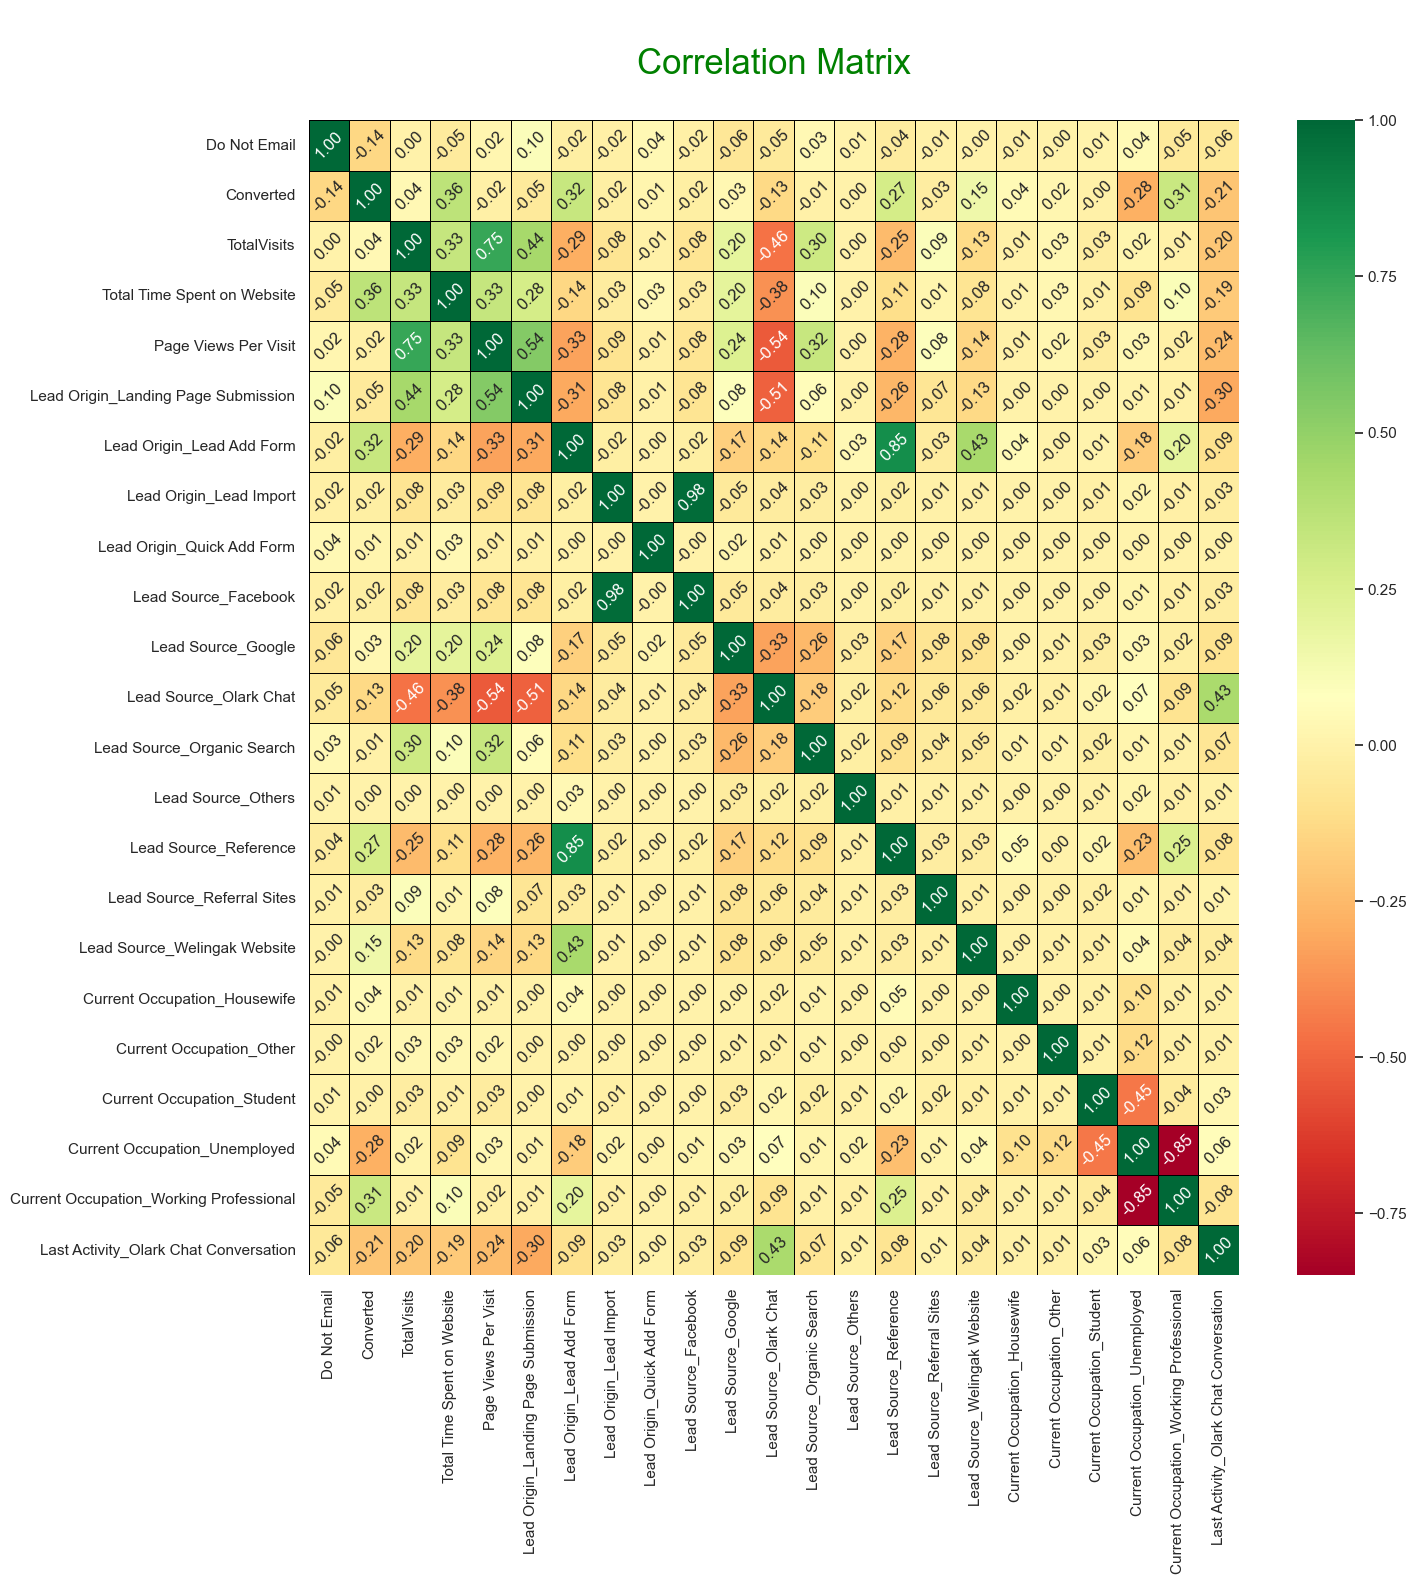

In [125]:
corr_columns = ['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Current Occupation_Housewife', 'Current Occupation_Other',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional', 'Last Activity_Olark Chat Conversation']
fig = plt.figure(figsize=(15,15))
ax = sns.heatmap(leads_df[corr_columns].corr(), cmap="RdYlGn", annot=True, 
                 annot_kws = {'size':12, 'rotation': 45, 'fontweight': 40}, 
                linewidth = 0.5, linecolor ='black', fmt='.2f')
plt.title("\nCorrelation Matrix\n", fontsize = 25, fontweight = 20, color = 'green')
plt.show()

 - From the above Correlation Matrix, it's clear that "Lead Source_Facebook" & "Lead Origin_Lead Import", "Lead Origin_Lead Add Form" & "Lead Source_Reference" have good correlation. Let's confirm this again by one more heatmap. 

In [126]:
new_corr_columns=["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]

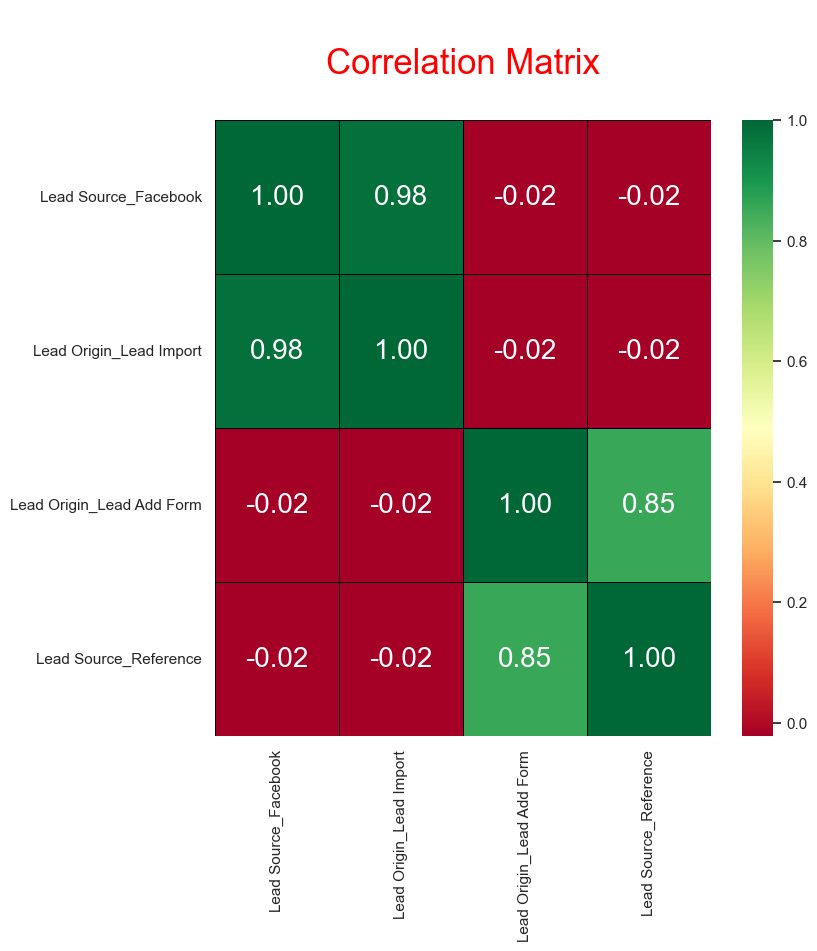

In [127]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(leads_df[new_corr_columns].corr(), cmap="RdYlGn", annot=True, 
                 annot_kws = {'size':20, 'fontweight': 40}, 
                linewidth = 0.5, linecolor ='black', fmt='.2f')
plt.title("\nCorrelation Matrix\n", fontsize = 25, fontweight = 20, color = 'red')

plt.show()

### Insights:
 - Now, it's pretty much clear that "Lead Source_Facebook" & "Lead Origin_Lead Import", "Lead Origin_Lead Add Form" & "Lead Source_Reference" are highly correlated. Let's drop any one from each pair. 

In [128]:
# Dropping highly correlated dummy variables
X_test = X_test.drop(['Lead Source_Facebook','Lead Origin_Lead Import'],1)
X_train = X_train.drop(['Lead Source_Facebook','Lead Origin_Lead Import'],1)

## 9. Model Building using Stats Model & RFE

In [129]:
# Let's use RFE for feature elimination
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [130]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
0                               Do Not Email            True        1
42              Current Occupation_Housewife            True        1
41                Specialization_Unspecified            True        1
29     Specialization_Hospitality Management            True        1
22                 Last Activity_Unreachable            True        1
21                    Last Activity_SMS Sent            True        1
19                      Last Activity_Others            True        1
18     Last Activity_Olark Chat Conversation            True        1
13              Lead Source_Welingak Website            True        1
23                Last Activity_Unsubscribed            True        1
46   Current Occupation_Working Professional            True        1
8                     Lead Source_Olark Chat            True        1
2                Total Time Spent on Website            True        1
4        Lead Origin_Landing Page Submission            True        1
5                  Lead Origin_Lead Add Form            True        1
16                Last Activity_Email Opened           False        2
45             Current Occupation_Unemployed           False        3
43                  Current Occupation_Other           False        4
44                Current Occupation_Student           False        5
37     Specialization_Rural and Agribusiness           False        6
32     Specialization_International Business           False        7
36          Specialization_Retail Management           False        8
10                        Lead Source_Others           False        9
11                     Lead Source_Reference           False       10
15          Last Activity_Email Link Clicked           False       11
1                                TotalVisits           False       12
3                       Page Views Per Visit           False       13
7                         Lead Source_Google           False       14
6                 Lead Origin_Quick Add Form           False       15
24    Specialization_Business Administration           False       16
35      Specialization_Operations Management           False       17
30  Specialization_Human Resource Management           False       18
33       Specialization_Marketing Management           False       19
38        Specialization_Services Excellence           False       20
39    Specialization_Supply Chain Management           False       21
20     Last Activity_Page Visited on Website           False       22
40         Specialization_Travel and Tourism           False       23
9                 Lead Source_Organic Search           False       24
31     Specialization_IT Projects Management           False       25
26                 Specialization_E-COMMERCE           False       26
12                Lead Source_Referral Sites           False       27
17   Last Activity_Form Submitted on Website           False       28
27         Specialization_Finance Management           False       29
14               Last Activity_Email Bounced           False       30
28      Specialization_Healthcare Management           False       31
34      Specialization_Media and Advertising           False       32
25                 Specialization_E-Business           False       33

In [131]:
rfe_col=X_train.columns[rfe.support_]
# Creating the independent variable dataset using these columns selected by RFE method.
X_train_rfe=X_train[rfe_col]

In [132]:
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Unspecified', 'Current Occupation_Housewife',
       'Current Occupation_Working Professional'],
      dtype='object')

In [133]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusines

In [134]:
X_train_rfe.shape

(6468, 15)

## 9.1: Re-usable function to calculate VIFs:

In [135]:
def vif_calc(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## 9.2: Re-usable function to build models

In [136]:
def model_building(col):
    X_train_sm = sm.add_constant(X_train[col])
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm1.fit()
    return res.summary()

## Model-1:

In [137]:
model_building(rfe_col)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.3
Date:                Mon, 27 Mar 2023   Deviance:                       5424.6
Time:                        16:34:10   Pearson chi2:                 9.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3878
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.4128      0.122     -3.390      0.001      -0.651      -0.174
Do Not Email                               -1.4741      0.173     -8.541      0.000      -1.812      -1.136
Total Time Spent on Website                 1.0644      0.039     27.355      0.000       0.988       1.141
Lead Origin_Landing Page Submission        -1.1189      0.126     -8.895      0.000      -1.365      -0.872
Lead Origin_Lead Add Form                   3.0925      0.203     15.259      0.000       2.695       3.490
Lead Source_Olark Chat                      1.0704      0.120      8.899      0.000       0.835       1.306
Lead Source_Welingak Website                2.5479      0.747      3.410      0.001       1.084       4.012
Last Activity_Olark Chat Conversation      -1.2744      0.169     -7.548      0.000      -1.605      -0.943
Last Activity_Others                        1.7804      0.471      3.778      0.000       0.857       2.704
Last Activity_SMS Sent                      1.3676      0.073     18.630      0.000       1.224       1.511
Last Activity_Unreachable                   0.3743      0.352      1.062      0.288      -0.316       1.065
Last Activity_Unsubscribed                  1.0358      0.480      2.156      0.031       0.094       1.977
Specialization_Hospitality Management      -1.0436      0.320     -3.262      0.001      -1.671      -0.417
Specialization_Unspecified                 -1.1807      0.121     -9.763      0.000      -1.418      -0.944
Current Occupation_Housewife               23.0067   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
Current Occupation_Working Professional     2.6191      0.189     13.825      0.000       2.248       2.990
===========================================================================================================
"""

In [138]:
vif_calc(rfe_col)

                                   Features    VIF
4                    Lead Source_Olark Chat 2.0300
12               Specialization_Unspecified 1.9900
8                    Last Activity_SMS Sent 1.5300
3                 Lead Origin_Lead Add Form 1.4800
6     Last Activity_Olark Chat Conversation 1.4600
2       Lead Origin_Landing Page Submission 1.4500
5              Lead Source_Welingak Website 1.2600
1               Total Time Spent on Website 1.2400
14  Current Occupation_Working Professional 1.1900
0                              Do Not Email 1.1700
10               Last Activity_Unsubscribed 1.0700
11    Specialization_Hospitality Management 1.0200
7                      Last Activity_Others 1.0100
9                 Last Activity_Unreachable 1.0100
13             Current Occupation_Housewife 1.0100


#### Insights of Model-1:
 - p-value of variable 'Current occupation_Housewife'(0.999 which is greater than the threshold value 0.05) and that of 'Last Activity_Unreachable' is 0.288. So, we can drop them.

In [139]:
# Dropping 'Current occupation_Housewife' column
X_train_rfe.drop(['Current Occupation_Housewife'],axis=1,inplace=True)

In [140]:
# Dropping 'Last Activity_Unreachable' column
X_train_rfe.drop(['Last Activity_Unreachable'],axis=1,inplace=True)

In [141]:
# Rechecking the columns
cols = X_train_rfe.columns
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Unspecified',
       'Current Occupation_Working Professional'],
      dtype='object')

## Model-2:

In [142]:
model_building(cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.1
Date:                Mon, 27 Mar 2023   Deviance:                       5440.2
Time:                        16:34:11   Pearson chi2:                 9.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3863
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3992      0.122     -3.285      0.001      -0.637      -0.161
Do Not Email                               -1.4789      0.173     -8.571      0.000      -1.817      -1.141
Total Time Spent on Website                 1.0623      0.039     27.358      0.000       0.986       1.138
Lead Origin_Landing Page Submission        -1.1140      0.126     -8.858      0.000      -1.360      -0.867
Lead Origin_Lead Add Form                   3.1048      0.202     15.343      0.000       2.708       3.501
Lead Source_Olark Chat                      1.0664      0.120      8.876      0.000       0.831       1.302
Lead Source_Welingak Website                2.5321      0.747      3.389      0.001       1.068       3.996
Last Activity_Olark Chat Conversation      -1.2820      0.169     -7.597      0.000      -1.613      -0.951
Last Activity_Others                        1.7668      0.471      3.751      0.000       0.844       2.690
Last Activity_SMS Sent                      1.3534      0.073     18.525      0.000       1.210       1.497
Last Activity_Unsubscribed                  1.0265      0.480      2.137      0.033       0.085       1.968
Specialization_Hospitality Management      -1.0492      0.320     -3.277      0.001      -1.677      -0.422
Specialization_Unspecified                 -1.1861      0.121     -9.810      0.000      -1.423      -0.949
Current Occupation_Working Professional     2.6099      0.189     13.782      0.000       2.239       2.981
===========================================================================================================
"""

In [143]:
vif_calc(cols)

                                   Features    VIF
4                    Lead Source_Olark Chat 2.0300
11               Specialization_Unspecified 1.9900
8                    Last Activity_SMS Sent 1.5300
3                 Lead Origin_Lead Add Form 1.4700
6     Last Activity_Olark Chat Conversation 1.4600
2       Lead Origin_Landing Page Submission 1.4400
5              Lead Source_Welingak Website 1.2600
1               Total Time Spent on Website 1.2400
12  Current Occupation_Working Professional 1.1900
0                              Do Not Email 1.1700
9                Last Activity_Unsubscribed 1.0700
10    Specialization_Hospitality Management 1.0200
7                      Last Activity_Others 1.0100


#### Insights of Model-2:
 - p-value of variable 'Last Activity_Unsubscribed' is high(0.033). So, we can drop it.

In [144]:
# Dropping 'Last Activity_Unsubscribed' column
X_train_rfe.drop('Last Activity_Unsubscribed', axis=1,inplace=True)

In [145]:
# Rechecking the columns
cols = X_train_rfe.columns
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Unspecified',
       'Current Occupation_Working Professional'],
      dtype='object')

## Model-3:

In [146]:
model_building(cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.1
Date:                Mon, 27 Mar 2023   Deviance:                       5444.3
Time:                        16:34:11   Pearson chi2:                 9.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3859
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3940      0.121     -3.244      0.001      -0.632      -0.156
Do Not Email                               -1.3811      0.163     -8.462      0.000      -1.701      -1.061
Total Time Spent on Website                 1.0621      0.039     27.360      0.000       0.986       1.138
Lead Origin_Landing Page Submission        -1.1164      0.126     -8.879      0.000      -1.363      -0.870
Lead Origin_Lead Add Form                   3.1048      0.203     15.328      0.000       2.708       3.502
Lead Source_Olark Chat                      1.0666      0.120      8.879      0.000       0.831       1.302
Lead Source_Welingak Website                2.5105      0.746      3.364      0.001       1.048       3.973
Last Activity_Olark Chat Conversation      -1.2876      0.169     -7.633      0.000      -1.618      -0.957
Last Activity_Others                        1.7573      0.471      3.732      0.000       0.835       2.680
Last Activity_SMS Sent                      1.3446      0.073     18.458      0.000       1.202       1.487
Specialization_Hospitality Management      -1.0325      0.319     -3.240      0.001      -1.657      -0.408
Specialization_Unspecified                 -1.1867      0.121     -9.816      0.000      -1.424      -0.950
Current Occupation_Working Professional     2.6151      0.189     13.800      0.000       2.244       2.987
===========================================================================================================
"""

In [147]:
vif_calc(cols)

                                   Features    VIF
4                    Lead Source_Olark Chat 2.0300
10               Specialization_Unspecified 1.9900
8                    Last Activity_SMS Sent 1.5200
3                 Lead Origin_Lead Add Form 1.4700
6     Last Activity_Olark Chat Conversation 1.4600
2       Lead Origin_Landing Page Submission 1.4400
5              Lead Source_Welingak Website 1.2600
1               Total Time Spent on Website 1.2400
11  Current Occupation_Working Professional 1.1900
0                              Do Not Email 1.1000
9     Specialization_Hospitality Management 1.0200
7                      Last Activity_Others 1.0100


#### Insights of Model-3:
 - All the P-values are below 0.05 and VIF is less than 5. So, this model looks fine. But, let's check Information Value(IV) for these columns which we have in Model3

In [148]:
# Reusable function to calculate Information Value(IV)
def iv_caln(df, feature, target):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Var', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad_Rate'] = data['Bad'] / data['All']
    data['Distribution_Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution_Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution_Good'] / data['Distribution_Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution_Good'] - data['Distribution_Bad'])).sum()
    data = data.sort_values(by='WoE', ascending=True)
    return data, data['IV']

In [149]:
# Checking Information Value of columns
for col in leads_df.columns:
    if col in cols:
        df, iv = iv_caln(leads_df, col, 'Converted')
        print('IV score of {} : '.format(col), " is ", round(iv,4))

IV score of Do Not Email :   is  0   0.0954
1   0.0954
Name: IV, dtype: float64
IV score of Total Time Spent on Website :   is  837    inf
1020   inf
1021   inf
1031   inf
1035   inf
        ..
6      inf
524    inf
53     inf
207    inf
214    inf
Name: IV, Length: 1359, dtype: float64
IV score of Lead Origin_Landing Page Submission :   is  0   0.0111
1   0.0111
Name: IV, dtype: float64
IV score of Lead Origin_Lead Add Form :   is  1   0.5615
0   0.5615
Name: IV, dtype: float64
IV score of Lead Source_Olark Chat :   is  1   0.0763
0   0.0763
Name: IV, dtype: float64
IV score of Lead Source_Welingak Website :   is  1   0.1853
0   0.1853
Name: IV, dtype: float64
IV score of Last Activity_Olark Chat Conversation :   is  0   0.2711
1   0.2711
Name: IV, dtype: float64
IV score of Last Activity_Others :   is  1   0.0115
0   0.0115
Name: IV, dtype: float64
IV score of Last Activity_SMS Sent :   is  1   0.4455
0   0.4455
Name: IV, dtype: float64
IV score of Specialization_Hospitality Manageme

### Insight:
 - Let's drop 'Specialization_Hospitality Management ' due to the lowest IV value(0.0003) and also has negative coefficient value.

In [150]:
X_train_rfe = X_train_rfe.drop(['Specialization_Hospitality Management'],axis=1)

In [151]:
# Rechecking the columns
cols = X_train_rfe.columns
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Unspecified',
       'Current Occupation_Working Professional'],
      dtype='object')

## Model-4:

In [152]:
model_building(cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.6
Date:                Mon, 27 Mar 2023   Deviance:                       5455.2
Time:                        16:34:22   Pearson chi2:                 9.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3849
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.4145      0.121     -3.421      0.001      -0.652      -0.177
Do Not Email                               -1.3908      0.163     -8.516      0.000      -1.711      -1.071
Total Time Spent on Website                 1.0568      0.039     27.308      0.000       0.981       1.133
Lead Origin_Landing Page Submission        -1.1098      0.126     -8.842      0.000      -1.356      -0.864
Lead Origin_Lead Add Form                   3.0789      0.202     15.252      0.000       2.683       3.475
Lead Source_Olark Chat                      1.0633      0.120      8.864      0.000       0.828       1.298
Lead Source_Welingak Website                2.5327      0.746      3.394      0.001       1.070       3.995
Last Activity_Olark Chat Conversation      -1.2898      0.168     -7.656      0.000      -1.620      -0.960
Last Activity_Others                        1.7679      0.470      3.760      0.000       0.846       2.690
Last Activity_SMS Sent                      1.3417      0.073     18.446      0.000       1.199       1.484
Specialization_Unspecified                 -1.1631      0.120     -9.655      0.000      -1.399      -0.927
Current Occupation_Working Professional     2.6076      0.189     13.783      0.000       2.237       2.978
===========================================================================================================
"""

In [153]:
vif_calc(cols)

                                   Features    VIF
4                    Lead Source_Olark Chat 2.0300
9                Specialization_Unspecified 1.9900
8                    Last Activity_SMS Sent 1.5200
3                 Lead Origin_Lead Add Form 1.4600
6     Last Activity_Olark Chat Conversation 1.4600
2       Lead Origin_Landing Page Submission 1.4200
5              Lead Source_Welingak Website 1.2600
1               Total Time Spent on Website 1.2400
10  Current Occupation_Working Professional 1.1900
0                              Do Not Email 1.1000
7                      Last Activity_Others 1.0100


In [154]:
# Rechecking the columns
cols = X_train_rfe.columns
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Unspecified',
       'Current Occupation_Working Professional'],
      dtype='object')

#### Insights of Model-4:
 - All the P-values are still below 0.05 and VIF is less than 5. So, this model also looks fine.
 - So, we can finalize Model-4 for 'Model Validation'

## 10. Model Evaluation:

In [155]:
X_train_rfe = X_train[cols]

X_train_sm = sm.add_constant(X_train_rfe)

# Creating a final model
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()  

logm.params

const                                     -0.4145
Do Not Email                              -1.3908
Total Time Spent on Website                1.0568
Lead Origin_Landing Page Submission       -1.1098
Lead Origin_Lead Add Form                  3.0789
Lead Source_Olark Chat                     1.0633
Lead Source_Welingak Website               2.5327
Last Activity_Olark Chat Conversation     -1.2898
Last Activity_Others                       1.7679
Last Activity_SMS Sent                     1.3417
Specialization_Unspecified                -1.1631
Current Occupation_Working Professional    2.6076
dtype: float64

## 10.1: Getting Predicted Value on the Train Set

In [156]:
y_train_pred = logm.predict(X_train_sm)
y_train_pred[:10]

1871   0.4288
6795   0.0641
3516   0.2236
8105   0.7791
3934   0.1900
4844   0.9878
3297   0.0915
8071   0.9988
987    0.2814
7423   0.8642
dtype: float64

In [157]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.42878031, 0.06408619, 0.22357357, 0.77906344, 0.19001293,
       0.98779708, 0.09149495, 0.99884644, 0.28144389, 0.86421771])

In [158]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0          0.4288         1871
1          0          0.0641         6795
2          0          0.2236         3516
3          0          0.7791         8105
4          0          0.1900         3934

In [159]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
0          0          0.4288         1871          0
1          0          0.0641         6795          0
2          0          0.2236         3516          0
3          0          0.7791         8105          1
4          0          0.1900         3934          0

In [160]:
# Reusable function for Logistic Regression Metrics
def log_reg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0] # true negatives
    TP =confusion_matrix[1,1] # true positive
    FP =confusion_matrix[0,1] # false positives
    FN =confusion_matrix[1,0] # false negatives
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN/(TN + FP)   
    PPV = TP /(TP + FP) # positive predictive value
    NPV = TN /(TN + FN) # negative predictive value
    sensitivity = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN) # true positive rate
    TNR = TN/(TN + FP) # true negative rate
    FPR = FP/(TN + FP) # false positive rate
    FNR = FN/(TP + FN) # false negative rate
    
    print ("True Negatives                        : ", TN)
    print ("False Positves                        : ", FP)
    print ("False Negatives                       : ", FN)
    print ("True Positives                        : ", TP)
    
    print ("Model Accuracy value is               : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is            : ", round(sensitivity*100,2),"%")
    print ("Model Specificity value is            : ", round(specificity*100,2),"%")
    print ("Model Precision value is              : ", round(precision*100,2),"%")
    print ("Model Recall value is                 : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)        : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)       : ", round(FPR*100,2),"%")
    print ("Positive Predictive Value             : ", PPV)
    print ("Negative Predictive Value             : ", NPV)

In [161]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print('Confusion Matrix:')
print(confusion_matrix)
print('------------------------------------------------------------')
log_reg_metrics(confusion_matrix)

Confusion Matrix:
[[3581  421]
 [ 832 1634]]
------------------------------------------------------------
True Negatives                        :  3581
False Positves                        :  421
False Negatives                       :  832
True Positives                        :  1634
Model Accuracy value is               :  80.63 %
Model Sensitivity value is            :  66.26 %
Model Specificity value is            :  89.48 %
Model Precision value is              :  79.51 %
Model Recall value is                 :  66.26 %
Model True Positive Rate (TPR)        :  66.26 %
Model False Positive Rate (FPR)       :  10.52 %
Positive Predictive Value             :  0.7951338199513382
Negative Predictive Value             :  0.811466122818944


## 10.2: Plotting ROC Curve

An ROC curve demonstrates several things:

 - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
 - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
 - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [162]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
# Recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

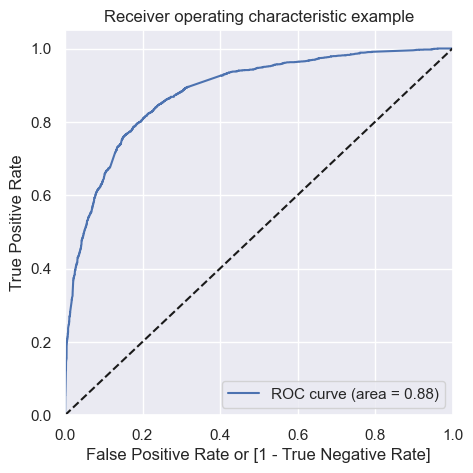

In [164]:
# Plotting the ROC curve 

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The Area of ROC Curve should have a value close to 1. We have got good value of 0.88. It indicates that our model is a good predictive model.

## 10.3: Finding Optimal Cut-off point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [165]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0          0.4288         1871          0    1    1    1    1    1   
1          0          0.0641         6795          0    1    0    0    0    0   
2          0          0.2236         3516          0    1    1    1    0    0   
3          0          0.7791         8105          1    1    1    1    1    1   
4          0          0.1900         3934          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [166]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, prec[1], rec[1]]
print(cutoff_df)

         prob  accuracy  sensitivity  specificity  Precision  Recall
0.0000 0.0000    0.3813       1.0000       0.0000     1.0000  0.0000
0.1000 0.1000    0.5914       0.9692       0.3586     0.4821  0.9692
0.2000 0.2000    0.7664       0.8925       0.6887     0.6385  0.8925
0.3000 0.3000    0.7944       0.8382       0.7674     0.6895  0.8382
0.4000 0.4000    0.8115       0.7689       0.8378     0.7450  0.7689
0.5000 0.5000    0.8063       0.6626       0.8948     0.7951  0.6626
0.6000 0.6000    0.7976       0.5937       0.9233     0.8267  0.5937
0.7000 0.7000    0.7817       0.5130       0.9473     0.8570  0.5130
0.8000 0.8000    0.7579       0.4152       0.9690     0.8920  0.4152
0.9000 0.9000    0.7083       0.2518       0.9895     0.9367  0.2518


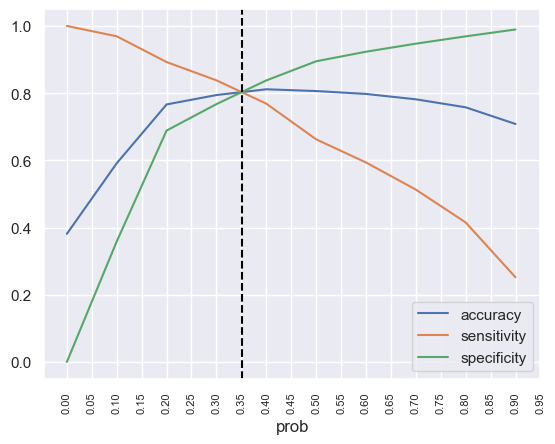

In [167]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.352, color='black', linestyle='--')
plt.xticks(rotation = 90)
plt.show()

From the above graph, Optimal Cut-off point is 0.352. It seems to be ideal. 

In [168]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.352 else 0)
# Deleting the unnecessary columns
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  final_Predicted
0          0          0.4288         1871          0                1
1          0          0.0641         6795          0                0
2          0          0.2236         3516          0                0
3          0          0.7791         8105          1                1
4          0          0.1900         3934          0                0

In [169]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob  Prospect ID  final_Predicted  Lead_Score
0          0          0.4288         1871                1          43
1          0          0.0641         6795                0           6
2          0          0.2236         3516                0          22
3          0          0.7791         8105                1          78
4          0          0.1900         3934                0          19

In [170]:
# Checking if 80% cases are correctly predicted based on the converted column.
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1972
0     494
Name: final_Predicted, dtype: int64

In [171]:
# check the precentage of final_predicted conversions

round(1972/float(1972+494),3)*100

80.0

## 10.4: Confusion Matrix:

In [172]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
print('Confusion Matrix:')
print(confusion_matrix)
print('------------------------------------------------------------')
log_reg_metrics(confusion_matrix)

Confusion Matrix:
[[3233  769]
 [ 494 1972]]
------------------------------------------------------------
True Negatives                        :  3233
False Positves                        :  769
False Negatives                       :  494
True Positives                        :  1972
Model Accuracy value is               :  80.47 %
Model Sensitivity value is            :  79.97 %
Model Specificity value is            :  80.78 %
Model Precision value is              :  71.94 %
Model Recall value is                 :  79.97 %
Model True Positive Rate (TPR)        :  79.97 %
Model False Positive Rate (FPR)       :  19.22 %
Positive Predictive Value             :  0.7194454578620941
Negative Predictive Value             :  0.8674537161255702


## 10.5: F1 Score

In [173]:
print("F1 Score: {}".format(f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)))

F1 Score: 0.7228489272284891


#### Inferences:
 - Model-4 with cut off value at 0.352 is providing an Sensitivity of 80% and Specificity is 80.78%. Sensitivity and Specificity in this case indicate how many leads the model identify correctly out of all potential leads which are converting. More than 80% is what the CEO has requested in this case study. Accuracy is 80.63%. F1 Score and precision value in the model has higher number for 0's than 1's. This indicates that the model predicts leads which will not convert ( i.e. filtering leads who will not convert) than the leads which will convert. This indirectly improved the model's performance to identify correct leads to be contacted.

## 10.6: Assigning 'Lead Score' feature to the Train Dataset

In [174]:
# Let's assign Lead_score to the Train Data Set
y_train_pred_final['lead_score']=(y_train_pred_final['Converted_prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_prob',ascending=False)

Converted  Converted_prob  Prospect ID  Predicted  final_Predicted  \
3115          1          0.9995         2656          1                1   
4891          1          0.9995         8074          1                1   
1229          0          0.9994         8057          1                1   
6312          1          0.9992         3428          1                1   
6187          1          0.9991         7579          1                1   
...         ...             ...          ...        ...              ...   
747           0          0.0082         6283          0                0   
4370          0          0.0080         4097          0                0   
2016          0          0.0075          976          0                0   
4534          0          0.0066         4043          0                0   
2722          0          0.0059         7557          0                0   

      Lead_Score  lead_score  
3115         100          99  
4891         100          99  
1229         100          99  
6312         100          99  
6187         100          99  
...          ...         ...  
747            1           0  
4370           1           0  
2016           1           0  
4534           1           0  
2722           1           0  

[6468 rows x 7 columns]

## 10.7 Precision - Recall Trade-Off

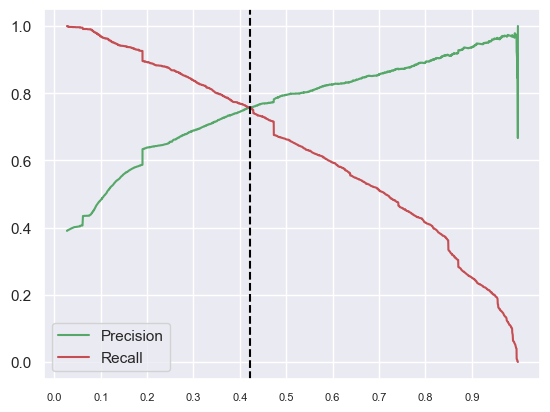

In [175]:
# Creating Precision-Recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-", label = 'Precision')
plt.plot(thresholds, r[:-1], "r-", label = 'Recall')
plt.xticks(np.arange(0,1,step=0.1),size=8)
plt.axvline(x=0.422, color='black', linestyle='--')
plt.legend()
plt.show()

 - The intersection point of the 2 curves is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.422 aprrox.

In [176]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['final_prediction_2'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.422 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  final_Predicted  \
0          0          0.4288         1871          0                1   
1          0          0.0641         6795          0                0   
2          0          0.2236         3516          0                0   
3          0          0.7791         8105          1                1   
4          0          0.1900         3934          0                0   

   Lead_Score  lead_score  final_prediction_2  
0          43          42                   1  
1           6           6                   0  
2          22          22                   0  
3          78          77                   1  
4          19          19                   0

## 10.8: Confusion Matrix after Precision-Recall Trade off

In [177]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction_2 )
print('Confusion Matrix:')
print(confusion_matrix)
print('------------------------------------------------------------')
log_reg_metrics(confusion_matrix)

Confusion Matrix:
[[3405  597]
 [ 600 1866]]
------------------------------------------------------------
True Negatives                        :  3405
False Positves                        :  597
False Negatives                       :  600
True Positives                        :  1866
Model Accuracy value is               :  81.49 %
Model Sensitivity value is            :  75.67 %
Model Specificity value is            :  85.08 %
Model Precision value is              :  75.76 %
Model Recall value is                 :  75.67 %
Model True Positive Rate (TPR)        :  75.67 %
Model False Positive Rate (FPR)       :  14.92 %
Positive Predictive Value             :  0.7576126674786845
Negative Predictive Value             :  0.850187265917603


#### Inferences:
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. He wants people to be correctly idenfied as leads with 80% success i.e., True Positive , True Positive Rate ,Sensitivity, Recall should be close to 80%, which we got using the previous cut off of 0.352. But, when used 0.404 cutoff . Hence, we will go for 0.352 cutoff.

### Conclusion: 
#### The evaluation metrics for Train Data:

 - Model Accuracy value : 80.47%
 - Model Sensitivity value : 79.97% ≈ 80%
 - Model Specificity value : 80.78%

## 11: Making Predictions using Final Model

## 11.1: Scaling Test Data

In [178]:
X_test.describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count     2772.0000    2772.0000                    2772.0000   
mean         0.0819       3.2244                     496.6172   
std          0.2742       2.9854                     551.3993   
min          0.0000       0.0000                       0.0000   
25%          0.0000       0.0000                      13.0000   
50%          0.0000       3.0000                     258.0000   
75%          0.0000       5.0000                     949.0000   
max          1.0000      12.5000                    2253.0000   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count             2772.0000                            2772.0000   
mean                 2.3014                               0.5303   
std                  1.9346                               0.4992   
min                  0.0000                               0.0000   
25%                  0.0000                               0.0000   
50%                  2.0000                               1.0000   
75%                  3.5000                               1.0000   
max                  7.5000                               1.0000   

       Lead Origin_Lead Add Form  Lead Origin_Quick Add Form  \
count                  2772.0000                   2772.0000   
mean                      0.0736                      0.0000   
std                       0.2612                      0.0000   
min                       0.0000                      0.0000   
25%                       0.0000                      0.0000   
50%                       0.0000                      0.0000   
75%                       0.0000                      0.0000   
max                       1.0000                      0.0000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
count           2772.0000               2772.0000                   2772.0000   
mean               0.3009                  0.1894                      0.1338   
std                0.4587                  0.3919                      0.3405   
min                0.0000                  0.0000                      0.0000   
25%                0.0000                  0.0000                      0.0000   
50%                0.0000                  0.0000                      0.0000   
75%                1.0000                  0.0000                      0.0000   
max                1.0000                  1.0000                      1.0000   

       ...  Specialization_Rural and Agribusiness  \
count  ...                              2772.0000   
mean   ...                                 0.0094   
std    ...                                 0.0964   
min    ...                                 0.0000   
25%    ...                                 0.0000   
50%    ...                                 0.0000   
75%    ...                                 0.0000   
max    ...                                 1.0000   

       Specialization_Services Excellence  \
count                           2772.0000   
mean                               0.0032   
std                                0.0569   
min                                0.0000   
25%                                0.0000   
50%                                0.0000   
75%                                0.0000   
max                                1.0000   

       Specialization_Supply Chain Management  \
count                               2772.0000   
mean                                   0.0382   
std                                    0.1918   
min                                    0.0000   
25%                                    0.0000   
50%                                    0.0000   
75%                                    0.0000   
max                                    1.0000   

       Specialization_Travel and Tourism  Specialization_Unspecified  \
count                          2772.0000                   2772.0000   
mean                           

In [179]:
# Scaling the test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0       1.5897                       0.9645   
2376             0      -1.0650                      -0.8854   
7766             0       0.5942                      -0.7774   
9199             0      -1.0650                      -0.8854   
4359             0      -1.0650                      -0.8854   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
4269                2.7409                                    0   
2376               -1.1849                                    0   
7766                1.4323                                    0   
9199               -1.1849                                    0   
4359               -1.1849                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Quick Add Form  \
4269                          0                           0   
2376                          1                           0   
7766                          0                           0   
9199                          0                           0   
4359                          1                           0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
4269                   0                       0                           0   
2376                   0                       0                           0   
7766                   1                       0                           0   
9199                   0                       1                           0   
4359                   0                       0                           0   

      ...  Specialization_Rural and Agribusiness  \
4269  ...                                      0   
2376  ...                                      0   
7766  ...                                      0   
9199  ...                                      0   
4359  ...                                      0   

      Specialization_Services Excellence  \
4269                                   0   
2376                                   0   
7766                                   0   
9199                                   0   
4359                                   0   

      Specialization_Supply Chain Management  \
4269                                       0   
2376                                       0   
7766                                       1   
9199                                       0   
4359                                       0   

      Specialization_Travel and Tourism  Specialization_Unspecified  \
4269                                  0                           1   
2376                                  0                           1   
7766                                  0                           0   
9199                                  0                           1   
4359                                  0                           0   

      Current Occupation_Housewife  Current Occupation_Other  \
4269                             0                         0   
2376                             0                         0   
7766                             0                         0   
9199                             0                         0   
4359                             0                         0   

      Current Occupation_Student  Current Occupation_Unemployed  \
4269                           0                              1   
2376                           0                              1   
7766                           0                              0   
9199                           0                              1   
4359                           0                              1   

      Current Occupation_Working Professional  
4269                                        0  
2376                                        0  
7766                                        1  
9199                                        0  
4359                                

In [180]:
X_test.describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count     2772.0000    2772.0000                    2772.0000   
mean         0.0819       0.0050                       0.0233   
std          0.2742       0.9907                       1.0089   
min          0.0000      -1.0650                      -0.8854   
25%          0.0000      -1.0650                      -0.8616   
50%          0.0000      -0.0695                      -0.4133   
75%          0.0000       0.5942                       0.8511   
max          1.0000       3.0830                       3.2371   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count             2772.0000                            2772.0000   
mean                 0.0198                               0.5303   
std                  1.0126                               0.4992   
min                 -1.1849                               0.0000   
25%                 -1.1849                               0.0000   
50%                 -0.1380                               1.0000   
75%                  0.6472                               1.0000   
max                  2.7409                               1.0000   

       Lead Origin_Lead Add Form  Lead Origin_Quick Add Form  \
count                  2772.0000                   2772.0000   
mean                      0.0736                      0.0000   
std                       0.2612                      0.0000   
min                       0.0000                      0.0000   
25%                       0.0000                      0.0000   
50%                       0.0000                      0.0000   
75%                       0.0000                      0.0000   
max                       1.0000                      0.0000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
count           2772.0000               2772.0000                   2772.0000   
mean               0.3009                  0.1894                      0.1338   
std                0.4587                  0.3919                      0.3405   
min                0.0000                  0.0000                      0.0000   
25%                0.0000                  0.0000                      0.0000   
50%                0.0000                  0.0000                      0.0000   
75%                1.0000                  0.0000                      0.0000   
max                1.0000                  1.0000                      1.0000   

       ...  Specialization_Rural and Agribusiness  \
count  ...                              2772.0000   
mean   ...                                 0.0094   
std    ...                                 0.0964   
min    ...                                 0.0000   
25%    ...                                 0.0000   
50%    ...                                 0.0000   
75%    ...                                 0.0000   
max    ...                                 1.0000   

       Specialization_Services Excellence  \
count                           2772.0000   
mean                               0.0032   
std                                0.0569   
min                                0.0000   
25%                                0.0000   
50%                                0.0000   
75%                                0.0000   
max                                1.0000   

       Specialization_Supply Chain Management  \
count                               2772.0000   
mean                                   0.0382   
std                                    0.1918   
min                                    0.0000   
25%                                    0.0000   
50%                                    0.0000   
75%                                    0.0000   
max                                    1.0000   

       Specialization_Travel and Tourism  Specialization_Unspecified  \
count                          2772.0000                   2772.0000   
mean                           

## 11.2: Predictions using Final Model

In [181]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[cols]
X_test.head()

Do Not Email  Total Time Spent on Website  \
4269             0                       0.9645   
2376             0                      -0.8854   
7766             0                      -0.7774   
9199             0                      -0.8854   
4359             0                      -0.8854   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
4269                       0                             0   
2376                       0                             0   
7766                       0                             0   
9199                       1                             0   
4359                       0                             0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     0   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Unspecified  \
4269                       1                           1   
2376                       1                           1   
7766                       0                           0   
9199                       0                           1   
4359                       0                           0   

      Current Occupation_Working Professional  
4269                                        0  
2376                                        0  
7766                                        1  
9199                                        0  
4359                                        0

In [182]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Unspecified',
       'Current Occupation_Working Professional'],
      dtype='object')

In [183]:
# Predicting the final test model 
y_test_pred = logm.predict(X_test_sm)
#checking the top 10 rows
y_test_pred[:10]

4269   0.6864
2376   0.8707
7766   0.7976
9199   0.0607
4359   0.8493
9186   0.5163
1631   0.3773
8963   0.1197
8007   0.1425
5324   0.3082
dtype: float64

In [184]:
# Converting y_pred to a dataframe
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269 0.6864
2376 0.8707
7766 0.7976
9199 0.0607
4359 0.8493

In [185]:
y_test

4269    1
2376    1
7766    1
9199    0
4359    1
       ..
8649    0
2152    1
7101    0
5331    0
2960    1
Name: Converted, Length: 2772, dtype: int64

In [186]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [187]:
# Putting RecordID to index
y_test_df['Record ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Record ID      0
0          1       4269 0.6864
1          1       2376 0.8707
2          1       7766 0.7976
3          0       9199 0.0607
4          1       4359 0.8493

In [188]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Record ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

Record ID  Converted  Converted_Prob
0       4269          1          0.6864
1       2376          1          0.8707
2       7766          1          0.7976
3       9199          0          0.0607
4       4359          1          0.8493

In [189]:
# Using the cut off 0.352 selected during Training
y_pred_final['final_prediction'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.352 else 0)
y_pred_final.head()

Record ID  Converted  Converted_Prob  final_prediction
0       4269          1          0.6864                 1
1       2376          1          0.8707                 1
2       7766          1          0.7976                 1
3       9199          0          0.0607                 0
4       4359          1          0.8493                 1

## 12: Model Evaluation

## 12.1: Confusion Matrix

In [190]:
confusion_matrix = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_prediction )
print('Confusion Matrix:')
print(confusion_matrix)
print('------------------------------------------------------------')
log_reg_metrics(confusion_matrix)

Confusion Matrix:
[[1363  314]
 [ 222  873]]
------------------------------------------------------------
True Negatives                        :  1363
False Positves                        :  314
False Negatives                       :  222
True Positives                        :  873
Model Accuracy value is               :  80.66 %
Model Sensitivity value is            :  79.73 %
Model Specificity value is            :  81.28 %
Model Precision value is              :  73.55 %
Model Recall value is                 :  79.73 %
Model True Positive Rate (TPR)        :  79.73 %
Model False Positive Rate (FPR)       :  18.72 %
Positive Predictive Value             :  0.7354675652906487
Negative Predictive Value             :  0.8599369085173502


### Conclusion: 
#### The evaluation metrics for Test Data:

 - Model Accuracy value : 80.66%
 - Model Sensitivity value : 79.73% ≈ 80%
 - Model Specificity value : 81.28%

## 12.2: F1 Score

In [191]:
print("F1 Score: {}".format(f1_score(y_pred_final.Converted, y_pred_final.final_prediction)))

F1 Score: 0.7651183172655565


## 12.3: ROC Curve

In [192]:
# Recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final['Converted'], y_pred_final['Converted_Prob'] , drop_intermediate = False )

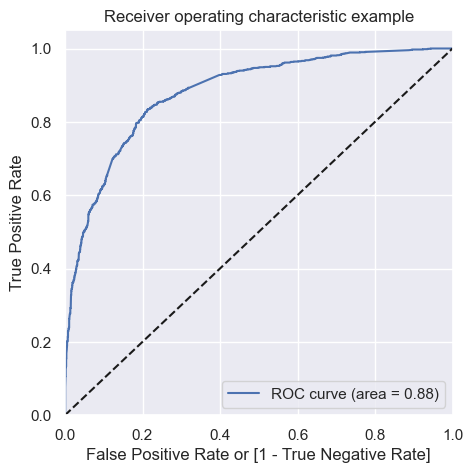

In [193]:
# Plotting the ROC curve 
draw_roc(y_pred_final['Converted'], y_pred_final['Converted_Prob'])

- Area under ROC curve is 0.88 out of 1 which indicates that it's a good predictive model

## 12.4: Adding Lead Score Feature to Test dataframe

In [194]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

Record ID  Converted  Converted_Prob  final_prediction  lead_score
546        3478          1          0.9995                 1          99
2405       5921          1          0.9991                 1          99
1026       5671          1          0.9988                 1          99
224        8120          1          0.9987                 1          99
835        4613          1          0.9986                 1          99
...         ...        ...             ...               ...         ...
1136       4098          0          0.0083                 0           0
597        3682          0          0.0076                 0           0
1396       7046          0          0.0075                 0           0
2443       9173          0          0.0073                 0           0
719        7488          0          0.0065                 0           0

[2772 rows x 5 columns]

## 12.5: Finding Top Predictors

In [195]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
top_predictors = logm.params[1:]
top_predictors.sort_values(ascending = False)

Lead Origin_Lead Add Form                  3.08
Current Occupation_Working Professional    2.61
Lead Source_Welingak Website               2.53
Last Activity_Others                       1.77
Last Activity_SMS Sent                     1.34
Lead Source_Olark Chat                     1.06
Total Time Spent on Website                1.06
Lead Origin_Landing Page Submission       -1.11
Specialization_Unspecified                -1.16
Last Activity_Olark Chat Conversation     -1.29
Do Not Email                              -1.39
dtype: float64

<Figure size 1200x800 with 0 Axes>

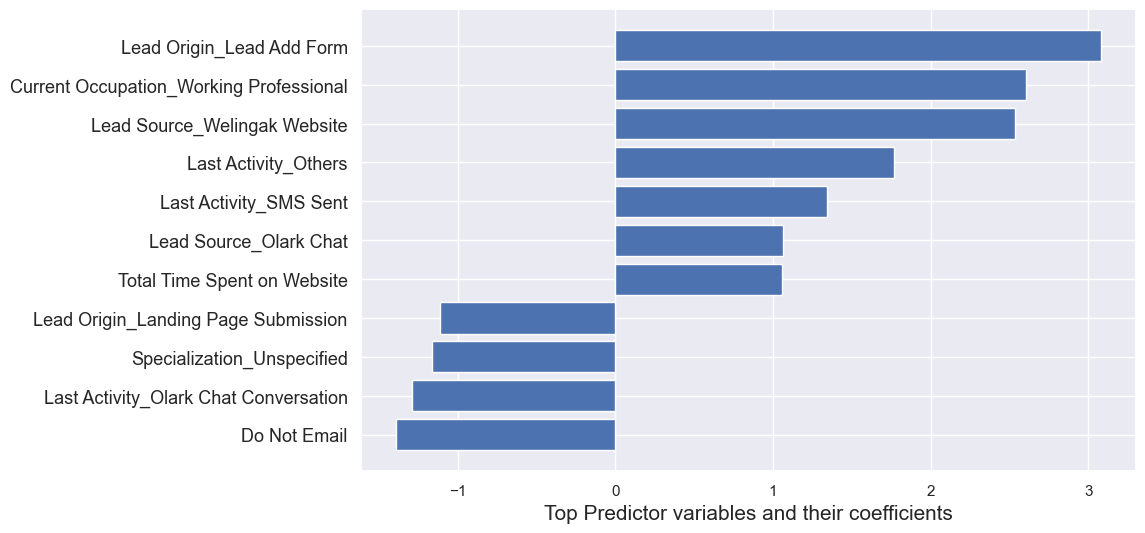

In [196]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[cols].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictor variables and their coefficients', fontsize=15)
plt.show()

#### Insights:
1.Top 3 Predictors which impact lead conversion positively are
 - Lead Origin_Lead Add Form: 3.08
 - Current Occupation_Working Professional: 2.61
 - Lead Source_Welingak Website: 2.53

2.'Lead Origin_Landing Page Submission', 'Specialization_Unspecified', 'Last Activity_Olark Chat Conversation'and 'Do Not Email' impact the lead conversion negatively.               

## 13. Conclusions

 - After running the model on the Train and Test Datasets, evaluation metrics meet the expectations of X-Education's CEO, which is to achieve 80% target lead conversion rate to be around 80%.

### Evaluation Metrics are
    
### Train Data:
 - Model Accuracy value : 80.47%
 - Model Sensitivity value : 79.97% ≈ 80%
 - Model Specificity value : 80.78%
    
### Test Data:
 - Model Accuracy value : 80.66 %
 - Model Sensitivity value : 79.73 % ≈ 80 %
 - Model Specificity value : 81.28 %
 
### Hence, our model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in reaching his goal to achieve 80% lead conversions with this model.

 - The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable. Here, the logistic regression model is used to predict the probability of conversion of a customer.

 - The Optimum cut off we chose after building the mode is 0.352 i.e., any lead with greater than 0.352 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.352 or less probability of converting is predicted as Cold Lead (customer will not convert)

 - Our final Logistic Regression Model is built with 11 features.

#### Features used in our final model are

['Do Not Email', 'Total Time Spent on Website',
'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
'Last Activity_SMS Sent', 'Specialization_Unspecified',
'urrent Occupation_Working Professional']

#### Top 3 Predictors which impact lead conversion positively are
 - Lead Origin_Lead Add Form:               3.08
 - Current Occupation_Working Professional: 2.61
 - Lead Source_Welingak Website:            2.53

Prospects having Lead Origin as "Lead Add form" , source as "Welingak Website" and those who are working professionals have high probability of conversion.

#### The variables which impact the lead conversion negatively are:-
 - Lead Origin_Landing Page Submission:       -1.11
 - Specialization_Unspecified:                -1.16
 - Last Activity_Olark Chat Conversation:     -1.29
 - Do Not Email:                              -1.39 


## 14: Recommendations

### Recommendation to the X Education for Potential buyers/Hot Leads:
From EDA:
 - Lead Origin: The highest leads are from "Landing Page Submission" followed by "API" Origin. Also, 36.2% of total leads from 'Land Page Submission' have been converted and 31.1% of the leads from 'API' have been successfully converted. But, conversion rate is high for the category 'Lead Add Form'. Around 92.5% of the leads from this category have been successfully converted. 
 - Lead Source: The highest leads are in "Direct Traffic" and "Google" Categories. But, Conversion rate is high in 'Welingak Website' and 'Reference' categories.
 - Do not email: 92% of the leads opted for not getting emails. Though they opted for no emails, 40.5% of these people were succefully converted.
 
#### So, we can put Lead Add Forms on all social media platforms especially on 'Welingak' Website as it has positive conversion coefficient. 
#### We must focus on features with positive coefficients.
#### Conversion rate of the leads from the Lead Source-Reference is also high. If the company offers good incentives for providing references and discounts to the converted leads using reference codes can increase the conversion rates. 

 - Last Activity: The number of Hot leads is higher in 'SMS Sent' and in 'Email Opened' category. Conversion rate is more in 'SMS Sent' category.
 - Specialization: Most of the leads didn't specify their Specialization. Most of the remaining are from Marketing Managemt, HR Management & Finance Management.
 - Occupation: Though most of the leads are under 'Unemployed' category, Businessmen and Working Professionals can be easily converted. Out of all the 3, Conversion rate of Working Professionals is the highest.
 
#### Working professionals have higher chances to convert as they can have financial stability, So more focus should be given in engaging with the Working professionals.  

#### By V V N V D Devi Mullapudi

# 🙏Thank You🙏